# EEST Benchmarks EDA

#### Maria Silva, September 2025

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
# plotting theme
sns.set_theme(
    style="whitegrid", palette="Set2", rc={"figure.dpi": 500, "axes.titlesize": 15}
)

## Load data

In this analysis, we are using data generated by running the [EEST benchmark suite](https://github.com/ethereum/execution-spec-tests/tree/main/tests/benchmark) with the [Nethermind benchmarking tooling](https://github.com/NethermindEth/gas-benchmarks). We extracted this data in 22-09-2025.

In [4]:
# Main directories
current_path = os.getcwd()
repo_dir = os.path.abspath(os.path.join(current_path, ".."))
data_dir = os.path.join(repo_dir, "data")

In [5]:
df = pd.read_csv(os.path.join(data_dir, "min_mgas_s_by_test_and_client_2025-09-22.csv"))
df = df.melt(
    id_vars=["test_title"], var_name="client", value_name="mgas/s"
).sort_values(by="mgas/s")

# Parse test title
df["test_file"] = (
    df["test_title"].str.replace("tests_benchmark_", "").str.split(".py").str[0]
)
df["test_name"] = (
    df["test_title"]
    .str.split(".py__")
    .str[1]
    .str.split("[")
    .str[0]
)
df["test_params"] = (
    df["test_title"]
    .str.split("[")
    .str[1]
    .str.split("]")
    .str[0]
    .str.split("engine_x")
    .str[1]
    .str[1:]
)
df["test_fork"] = df["test_title"].str.split("fork_").str[1].str.split("-").str[0]
# Parse opcodes
df["test_opcode"] = df["test_params"].str.extract(r"(?:opcode_|op_)([^-]+)")
df["test_opcode"] = np.where(df["test_name"]=="test_worst_modexp", "MODEXP", df["test_opcode"])
df["test_opcode"] = np.where(df["test_name"].str.contains("selfdestruct"), "SELFDESTRUCT", df["test_opcode"])
df["test_opcode"] = np.where(df["test_name"]=="test_worst_calldatacopy", "CALLDATACOPY", df["test_opcode"])
df["test_opcode"] = np.where(df["test_name"]=="test_worst_mcopy", "MCOPY", df["test_opcode"])
df["test_opcode"] = np.where(df["test_name"]=="test_worst_codecopy", "CODECOPY", df["test_opcode"])
df["test_opcode"] = np.where(df["test_name"]=="test_worst_returndatacopy", "RETURNDATACOPY", df["test_opcode"])
df["test_opcode"] = np.where(df["test_name"].str.contains("returndatasize"), "RETURNDATASIZE", df["test_opcode"])
df["test_opcode"] = np.where(df["test_name"].str.contains("extcodecopy"), "EXTCODECOPY", df["test_opcode"])
df["test_opcode"] = np.where(df["test_name"]=="test_worst_calldataload", "CALLDATALOAD", df["test_opcode"])
df["test_opcode"] = np.where(df["test_name"]=="test_worst_keccak", "KECCAK", df["test_opcode"])
df["test_opcode"] = np.where(df["test_name"]=="test_worst_shifts", df["test_params"].str[-3:], df["test_opcode"])
df["test_opcode"] = np.where(df["test_name"]=="test_worst_selfbalance", "SELFBALANCE", df["test_opcode"])
df["test_opcode"] = np.where(df["test_name"]=="test_worst_msize", "MSIZE", df["test_opcode"])
df["test_opcode"] = np.where(df["test_name"]=="test_worst_jumpdests", "JUMPDEST", df["test_opcode"])
df["test_opcode"] = np.where(df["test_name"].str.contains("jumpi"), "JUMPI", df["test_opcode"])
df["test_opcode"] = np.where(df["test_name"]=="test_worst_jumps", "JUMP", df["test_opcode"])
df["test_opcode"] = np.where(df["test_name"]=="test_worst_tstore", "TSTORE", df["test_opcode"])
df["test_opcode"] = np.where(df["test_name"]=="test_worst_tload", "TLOAD", df["test_opcode"])
df["test_opcode"] = np.where(df["test_params"].str.contains("SSTORE"), "SSTORE", df["test_opcode"])
df["test_opcode"] = np.where(df["test_params"].str.contains("SLOAD"), "SLOAD", df["test_opcode"])
df["test_opcode"] = np.where(df["test_name"]=="test_worst_log_opcodes", "LOG", df["test_opcode"])
df["test_opcode"] = np.where(df["test_name"]=="test_worst_calldatasize", "CALLDATASIZE", df["test_opcode"])
df["test_opcode"] = np.where(df["test_name"]=="test_worst_blobhash", "BLOBHASH", df["test_opcode"])
df["test_opcode"] = np.where(df["test_name"]=="test_worst_blockhash", "BLOCKHASH", df["test_opcode"])
df["test_opcode"] = np.where(df["test_name"]=="test_worst_callvalue", "CALLVALUE", df["test_opcode"])
df["test_opcode"] = np.where(df["test_params"].str.contains("bn128_add"), "ecAdd", df["test_opcode"])
df["test_opcode"] = np.where(df["test_params"].str.contains("bn128_mul"), "ecMul", df["test_opcode"])
df["test_opcode"] = np.where((df["test_params"].str.contains("bn128")) & (df["test_params"].str.contains("pairing")), "ecPairing", df["test_opcode"])
df["test_opcode"] = np.where(df["test_name"]=="test_amortized_bn128_pairings", "ecPairing", df["test_opcode"])
df["test_opcode"] = np.where(df["test_params"].str.contains("point_evaluation"), "point evaluation", df["test_opcode"])
df["test_opcode"] = np.where(df["test_params"].str.contains("blake2f"), "blake2f", df["test_opcode"])
df["test_opcode"] = np.where(df["test_params"].str.contains("ecrecover"), "ecRecover", df["test_opcode"])
df["test_opcode"] = np.where(df["test_params"].str.contains("SHA2-256"), "SHA2-256", df["test_opcode"]) 
df["test_opcode"] = np.where(df["test_params"].str.contains("RIPEMD-160"), "RIPEMD-160", df["test_opcode"])
df["test_opcode"] = np.where(df["test_params"].str.contains("IDENTITY"), "identity", df["test_opcode"])
df["test_opcode"] = np.where(df["test_params"].str.contains("bls12_g1add"), "BLS12_G1ADD", df["test_opcode"])
df["test_opcode"] = np.where(df["test_params"].str.contains("bls12_g1msm"), "BLS12_G1MSM", df["test_opcode"])
df["test_opcode"] = np.where(df["test_params"].str.contains("bls12_g2add"), "BLS12_G2ADD", df["test_opcode"])
df["test_opcode"] = np.where(df["test_params"].str.contains("bls12_g2msm"), "BLS12_G2MSM", df["test_opcode"])
df["test_opcode"] = np.where(df["test_params"].str.contains("bls12_pairing_check"), "BLS12_PAIRING_CHECK", df["test_opcode"])
df["test_opcode"] = np.where(df["test_params"].str.contains("bls12_fp_to_g1"), "BLS12_MAP_FP_TO_G1", df["test_opcode"])
df["test_opcode"] = np.where(df["test_params"].str.contains("bls12_fp_to_g2"), "BLS12_MAP_FP2_TO_G2", df["test_opcode"])

df = df.drop(columns=["test_title"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2305 entries, 441 to 1853
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client       2305 non-null   object 
 1   mgas/s       2305 non-null   float64
 2   test_file    2305 non-null   object 
 3   test_name    2305 non-null   object 
 4   test_params  2305 non-null   object 
 5   test_fork    2305 non-null   object 
 6   test_opcode  2260 non-null   object 
dtypes: float64(1), object(6)
memory usage: 144.1+ KB


In [5]:
df[df["test_opcode"].isna()]["test_name"].unique()

array(['test_block_full_access_list_and_data', 'test_block_full_data',
       'test_block_full_of_ether_transfers', 'test_empty_block'],
      dtype=object)

## Quick stats

In [6]:
df["mgas/s"].describe().T.round(2)

count    2305.00
mean      177.56
std       105.70
min         1.84
25%        92.70
50%       154.00
75%       259.00
max       505.00
Name: mgas/s, dtype: float64

In [7]:
df.groupby("client")["mgas/s"].describe().T.round(2)

client    besu  erigon    geth  nethermind    reth
count   461.00  461.00  461.00      461.00  461.00
mean    130.18  149.63  157.85      241.11  209.03
std     110.45   89.96  103.72       90.80   90.60
min       1.84   30.20   11.30       40.90   22.20
25%      52.60   91.50   87.20      174.00  138.00
50%      96.60  118.00  129.00      231.00  224.00
75%     159.00  204.00  204.00      328.00  270.00
max     414.00  381.00  412.00      424.00  505.00

## Worst and best test cases

In [8]:
df.head(10)

client  mgas/s                    test_file  \
441   besu    1.84  test_worst_stateful_opcodes   
440   besu    1.95  test_worst_stateful_opcodes   
167   besu    2.68           test_worst_compute   
110   besu    9.70           test_worst_compute   
109   besu    9.99           test_worst_compute   
189   besu   10.10           test_worst_compute   
188   besu   10.30           test_worst_compute   
192   besu   10.30           test_worst_compute   
108   besu   10.90           test_worst_compute   
193   besu   10.90           test_worst_compute   

                            test_name                             test_params  \
441  test_worst_selfdestruct_existing                      value_bearing_True   
440  test_worst_selfdestruct_existing                     value_bearing_False   
167                 test_worst_modexp    from_state_test-mod_vul_guido_3_even   
110               test_worst_modarith  from_state_test-op_MULMOD-mod_bits_255   
109               test_worst_modarith  from_state_test-op_MULMOD-mod_bits_191   
189                    test_worst_mod     from_state_test-op_MOD-mod_bits_191   
188                    test_worst_mod     from_state_test-op_MOD-mod_bits_127   
192                    test_worst_mod    from_state_test-op_SMOD-mod_bits_127   
108               test_worst_modarith  from_state_test-op_MULMOD-mod_bits_127   
193                    test_worst_mod    from_state_test-op_SMOD-mod_bits_191   

    test_fork   test_opcode  
441    Prague  SELFDESTRUCT  
440    Prague  SELFDESTRUCT  
167    Prague        MODEXP  
110    Prague        MULMOD  
109    Prague        MULMOD  
189    Prague           MOD  
188    Prague           MOD  
192    Prague          SMOD  
108    Prague        MULMOD  
193    Prague          SMOD

In [9]:
df.groupby('client').head(3).sort_values("client")

client  mgas/s                    test_file  \
441         besu    1.84  test_worst_stateful_opcodes   
440         besu    1.95  test_worst_stateful_opcodes   
167         besu    2.68           test_worst_compute   
684       erigon   30.20           test_worst_compute   
592       erigon   34.90           test_worst_compute   
599       erigon   35.40           test_worst_compute   
1060        geth   11.30           test_worst_compute   
1106        geth   11.30           test_worst_compute   
1063        geth   11.40           test_worst_compute   
1492  nethermind   40.90           test_worst_compute   
1493  nethermind   41.10           test_worst_compute   
1491  nethermind   41.50           test_worst_compute   
1982        reth   22.20           test_worst_compute   
2067        reth   30.50           test_worst_compute   
2045        reth   45.80           test_worst_compute   

                             test_name  \
441   test_worst_selfdestruct_existing   
440   test_worst_selfdestruct_existing   
167                  test_worst_modexp   
684   test_worst_precompile_fixed_cost   
592                  test_worst_modexp   
599                  test_worst_modexp   
1060                 test_worst_modexp   
1106                 test_worst_modexp   
1063                 test_worst_modexp   
1492               test_worst_modarith   
1493               test_worst_modarith   
1491               test_worst_modarith   
1982                 test_worst_modexp   
2067  test_worst_precompile_fixed_cost   
2045  test_worst_precompile_fixed_cost   

                                    test_params test_fork       test_opcode  
441                          value_bearing_True    Prague      SELFDESTRUCT  
440                         value_bearing_False    Prague      SELFDESTRUCT  
167        from_state_test-mod_vul_guido_3_even    Prague            MODEXP  
684            from_state_test-point_evaluation    Prague  point evaluation  
592        from_state_test-mod_even_24b_exp_168    Prague            MODEXP  
599         from_state_test-mod_even_8b_exp_896    Prague            MODEXP  
1060        from_state_test-mod_even_8b_exp_896    Prague            MODEXP  
1106  from_state_test-mod_vul_pawel_1_exp_heavy    Prague            MODEXP  
1063  from_state_test-mod_exp_298_gas_exp_heavy    Prague            MODEXP  
1492     from_state_test-op_MULMOD-mod_bits_191    Prague            MULMOD  
1493     from_state_test-op_MULMOD-mod_bits_255    Prague            MULMOD  
1491     from_state_test-op_MULMOD-mod_bits_127    Prague            MULMOD  
1982        from_state_test-mod_even_8b_exp_896    Prague            MODEXP  
2067           from_state_test-point_evaluation    Prague  point evaluation  
2045                    from_state_test-blake2f    Prague           blake2f

In [10]:
df.tail(10)

client  mgas/s                    test_file  \
1561  nethermind   405.0           test_worst_compute   
1529  nethermind   408.0           test_worst_compute   
365         besu   408.0            test_worst_opcode   
1790  nethermind   410.0            test_worst_opcode   
1307        geth   412.0            test_worst_opcode   
363         besu   414.0            test_worst_opcode   
1392  nethermind   415.0           test_worst_compute   
1836  nethermind   418.0  test_worst_stateful_opcodes   
1762  nethermind   424.0            test_worst_opcode   
1853        reth   505.0           test_worst_compute   

                           test_name  \
1561               test_worst_modexp   
1529               test_worst_modexp   
365           test_worst_log_opcodes   
1790          test_worst_log_opcodes   
1307          test_worst_log_opcodes   
363           test_worst_log_opcodes   
1392                test_empty_block   
1836  test_worst_storage_access_cold   
1762          test_worst_log_opcodes   
1853                test_empty_block   

                                            test_params test_fork test_opcode  
1561     from_state_test-mod_vul_nagydani_4_pow_0x10001    Prague      MODEXP  
1529              from_state_test-mod_odd_128b_exp_1024    Prague      MODEXP  
365   from_state_test-fixed_offset_False-non_zero_to...    Prague         LOG  
1790  from_state_test-fixed_offset_True-zeros_topic-...    Prague         LOG  
1307  from_state_test-fixed_offset_False-zeros_topic...    Prague         LOG  
363   from_state_test-fixed_offset_False-non_zero_to...    Prague         LOG  
1392                                                       Prague         NaN  
1836     absent_slots_True-SSTORE new value, out of gas    Prague      SSTORE  
1762  from_state_test-fixed_offset_False-zeros_topic...    Prague         LOG  
1853                                                       Prague         NaN

In [11]:
df.groupby('client').tail(3).sort_values("client")

client  mgas/s                    test_file  \
410         besu   403.0            test_worst_opcode   
365         besu   408.0            test_worst_opcode   
363         besu   414.0            test_worst_opcode   
681       erigon   372.0           test_worst_compute   
470       erigon   380.0           test_worst_compute   
894       erigon   381.0  test_worst_stateful_opcodes   
1333        geth   398.0            test_worst_opcode   
1380        geth   402.0  test_worst_stateful_opcodes   
1307        geth   412.0            test_worst_opcode   
1392  nethermind   415.0           test_worst_compute   
1836  nethermind   418.0  test_worst_stateful_opcodes   
1762  nethermind   424.0            test_worst_opcode   
2277        reth   376.0  test_worst_stateful_opcodes   
2259        reth   393.0            test_worst_opcode   
1853        reth   505.0           test_worst_compute   

                             test_name  \
410             test_worst_log_opcodes   
365             test_worst_log_opcodes   
363             test_worst_log_opcodes   
681   test_worst_precompile_fixed_cost   
470                   test_empty_block   
894               test_worst_blockhash   
1333            test_worst_log_opcodes   
1380    test_worst_storage_access_warm   
1307            test_worst_log_opcodes   
1392                  test_empty_block   
1836    test_worst_storage_access_cold   
1762            test_worst_log_opcodes   
2277              test_worst_blockhash   
2259            test_worst_log_opcodes   
1853                  test_empty_block   

                                            test_params test_fork test_opcode  
410   from_state_test-fixed_offset_True-zeros_topic-...    Prague         LOG  
365   from_state_test-fixed_offset_False-non_zero_to...    Prague         LOG  
363   from_state_test-fixed_offset_False-non_zero_to...    Prague         LOG  
681            from_state_test-bn128_two_pairings_empty    Prague   ecPairing  
470                                                        Prague         NaN  
894                                                        Prague   BLOCKHASH  
1333  from_state_test-fixed_offset_True-zeros_topic-...    Prague         LOG  
1380                                              SLOAD    Prague       SLOAD  
1307  from_state_test-fixed_offset_False-zeros_topic...    Prague         LOG  
1392                                                       Prague         NaN  
1836     absent_slots_True-SSTORE new value, out of gas    Prague      SSTORE  
1762  from_state_test-fixed_offset_False-zeros_topic...    Prague         LOG  
2277                                                       Prague   BLOCKHASH  
2259  from_state_test-fixed_offset_True-zeros_topic-...    Prague         LOG  
1853                                                       Prague         NaN

## Overall distribution of mgas/s

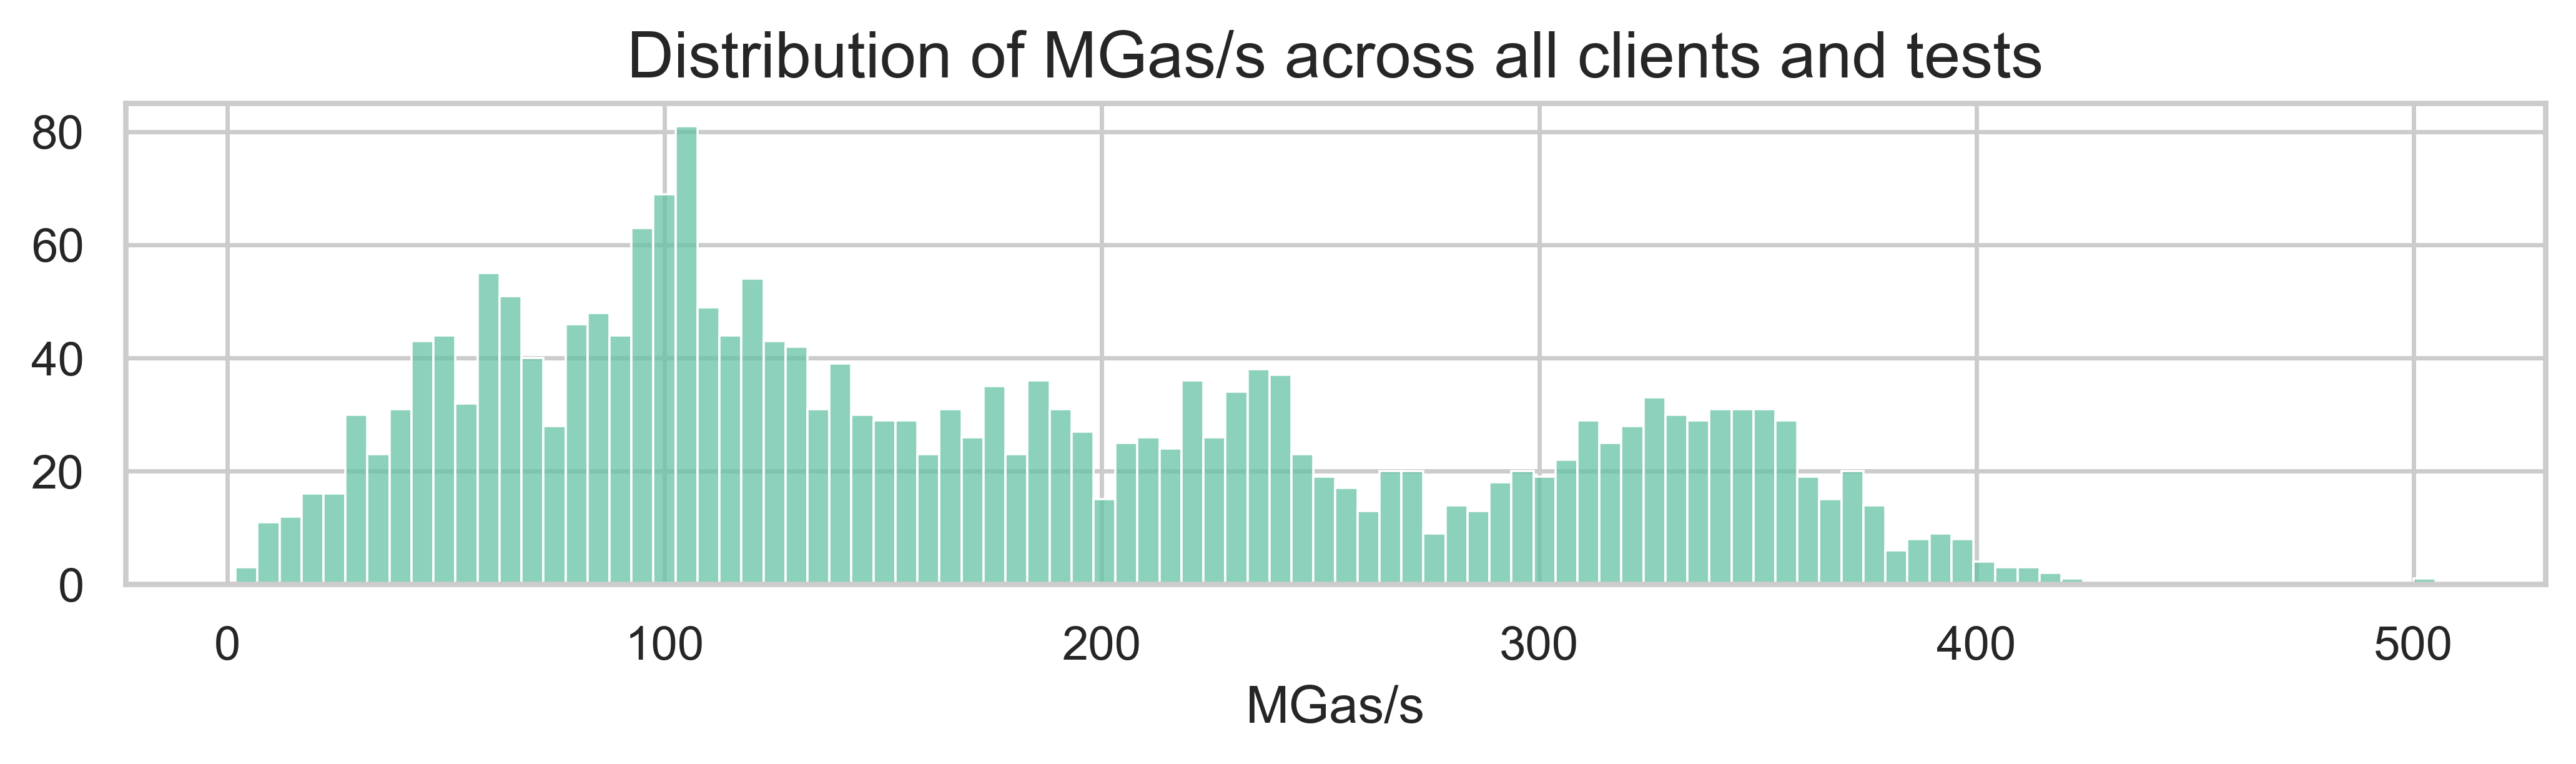

In [12]:
plt.figure(figsize=(10, 2))
sns.histplot(
    data=df,
    x="mgas/s",
    bins=100
)
plt.title("Distribution of MGas/s across all clients and tests")
plt.ylabel("")
plt.xlabel("MGas/s")
plt.show()

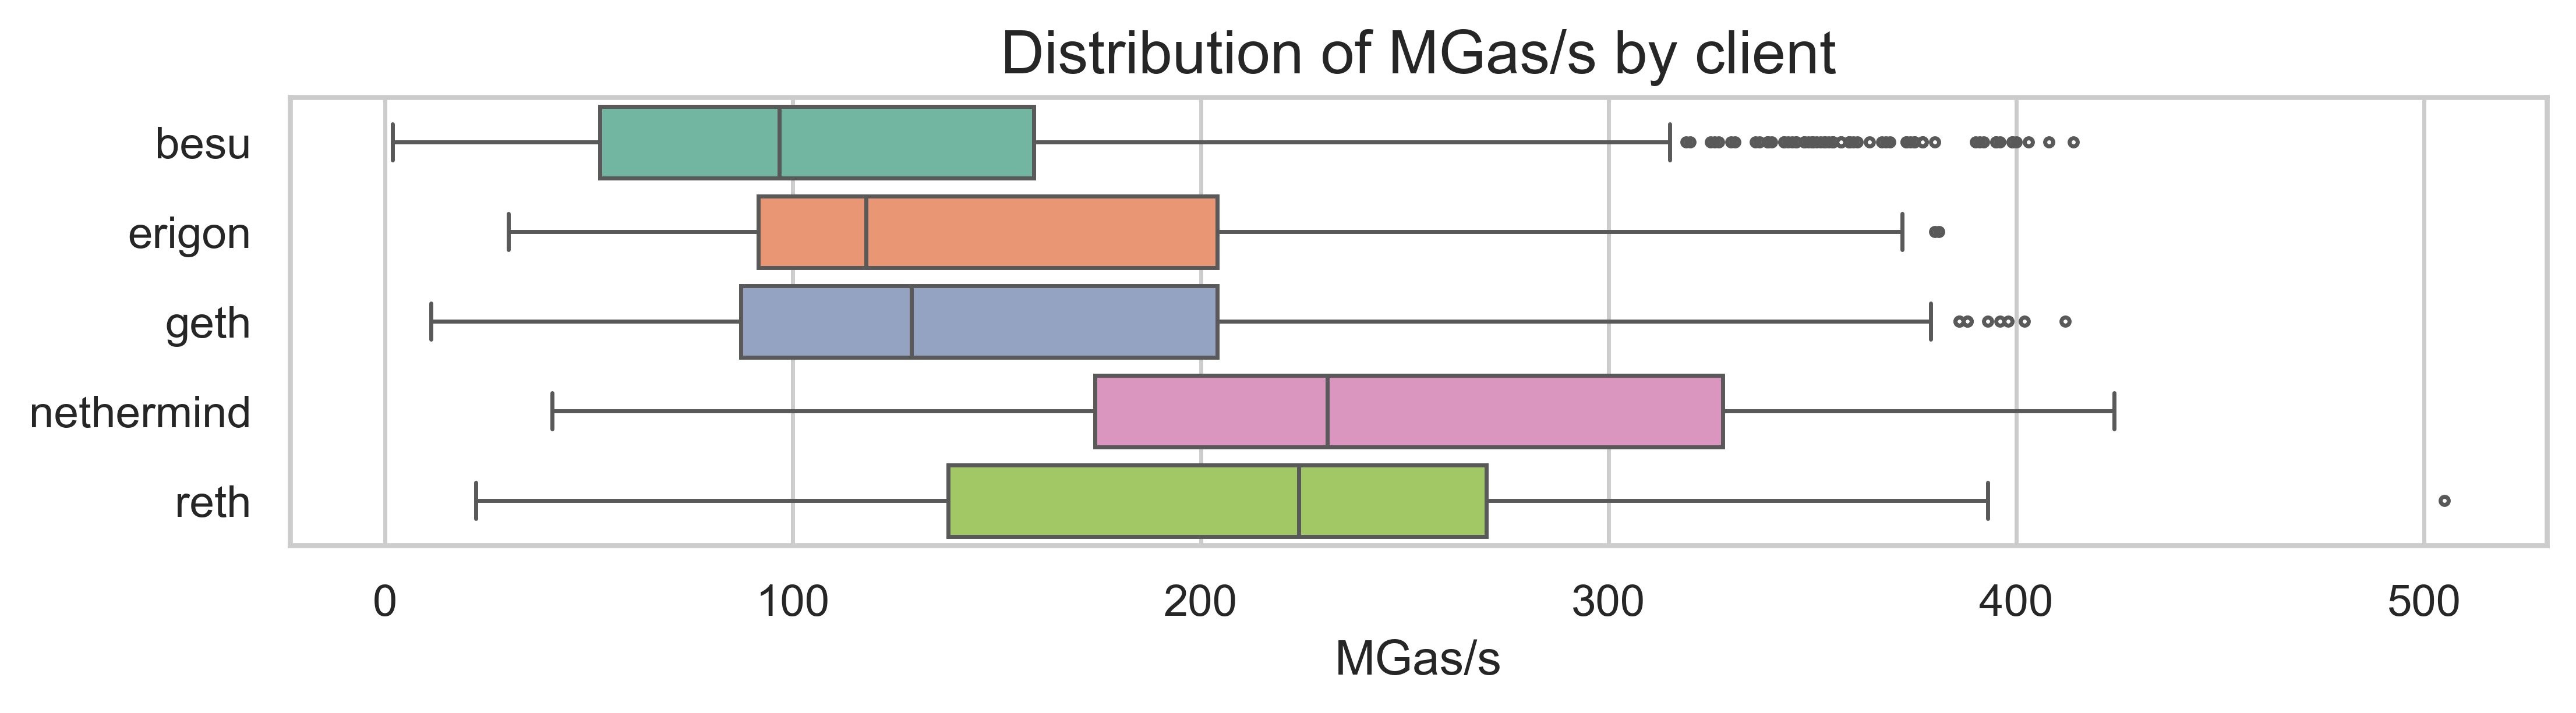

In [13]:
plt.figure(figsize=(10, 2))
sns.boxplot(
    data=df.sort_values("client"),
    x="mgas/s",
    y="client",
    hue="client",
    legend=False,
    fliersize=2
)
plt.title("Distribution of MGas/s by client")
plt.ylabel("")
plt.xlabel("MGas/s")
plt.show()

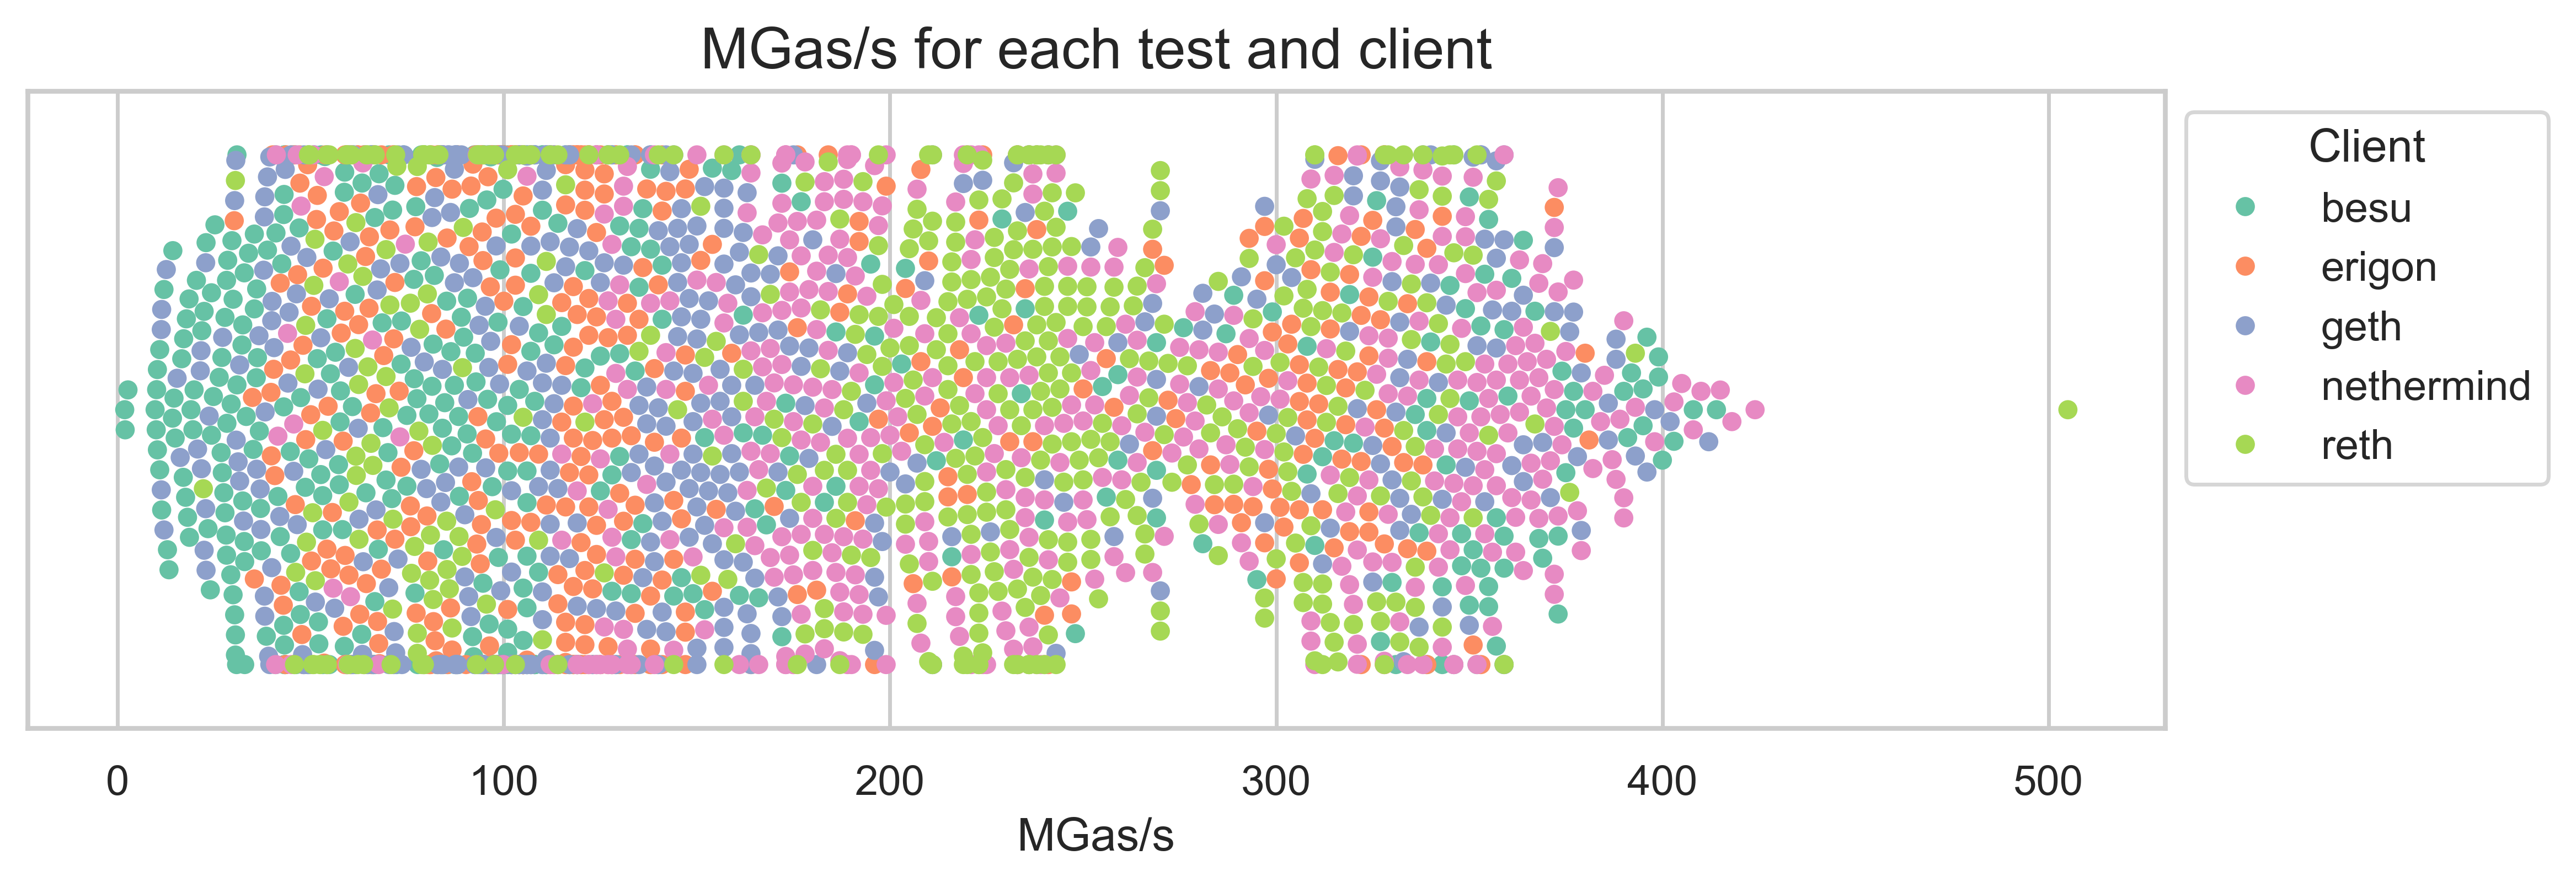

In [14]:
plt.figure(figsize=(10, 3))
sns.swarmplot(
    data=df.sort_values("client"),
    x="mgas/s",
    hue="client"
)
plt.title("MGas/s for each test and client")
plt.ylabel("")
plt.xlabel("MGas/s")
plt.legend(title="Client", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

## Worse time per case

In [6]:
worse_df = df.groupby(["test_file", "test_name", "test_params"]).first().reset_index()

worse_df["mgas/s"].describe().T.round(2)

count    461.00
mean     113.70
std       94.30
min        1.84
25%       43.00
50%       87.80
75%      132.00
max      376.00
Name: mgas/s, dtype: float64

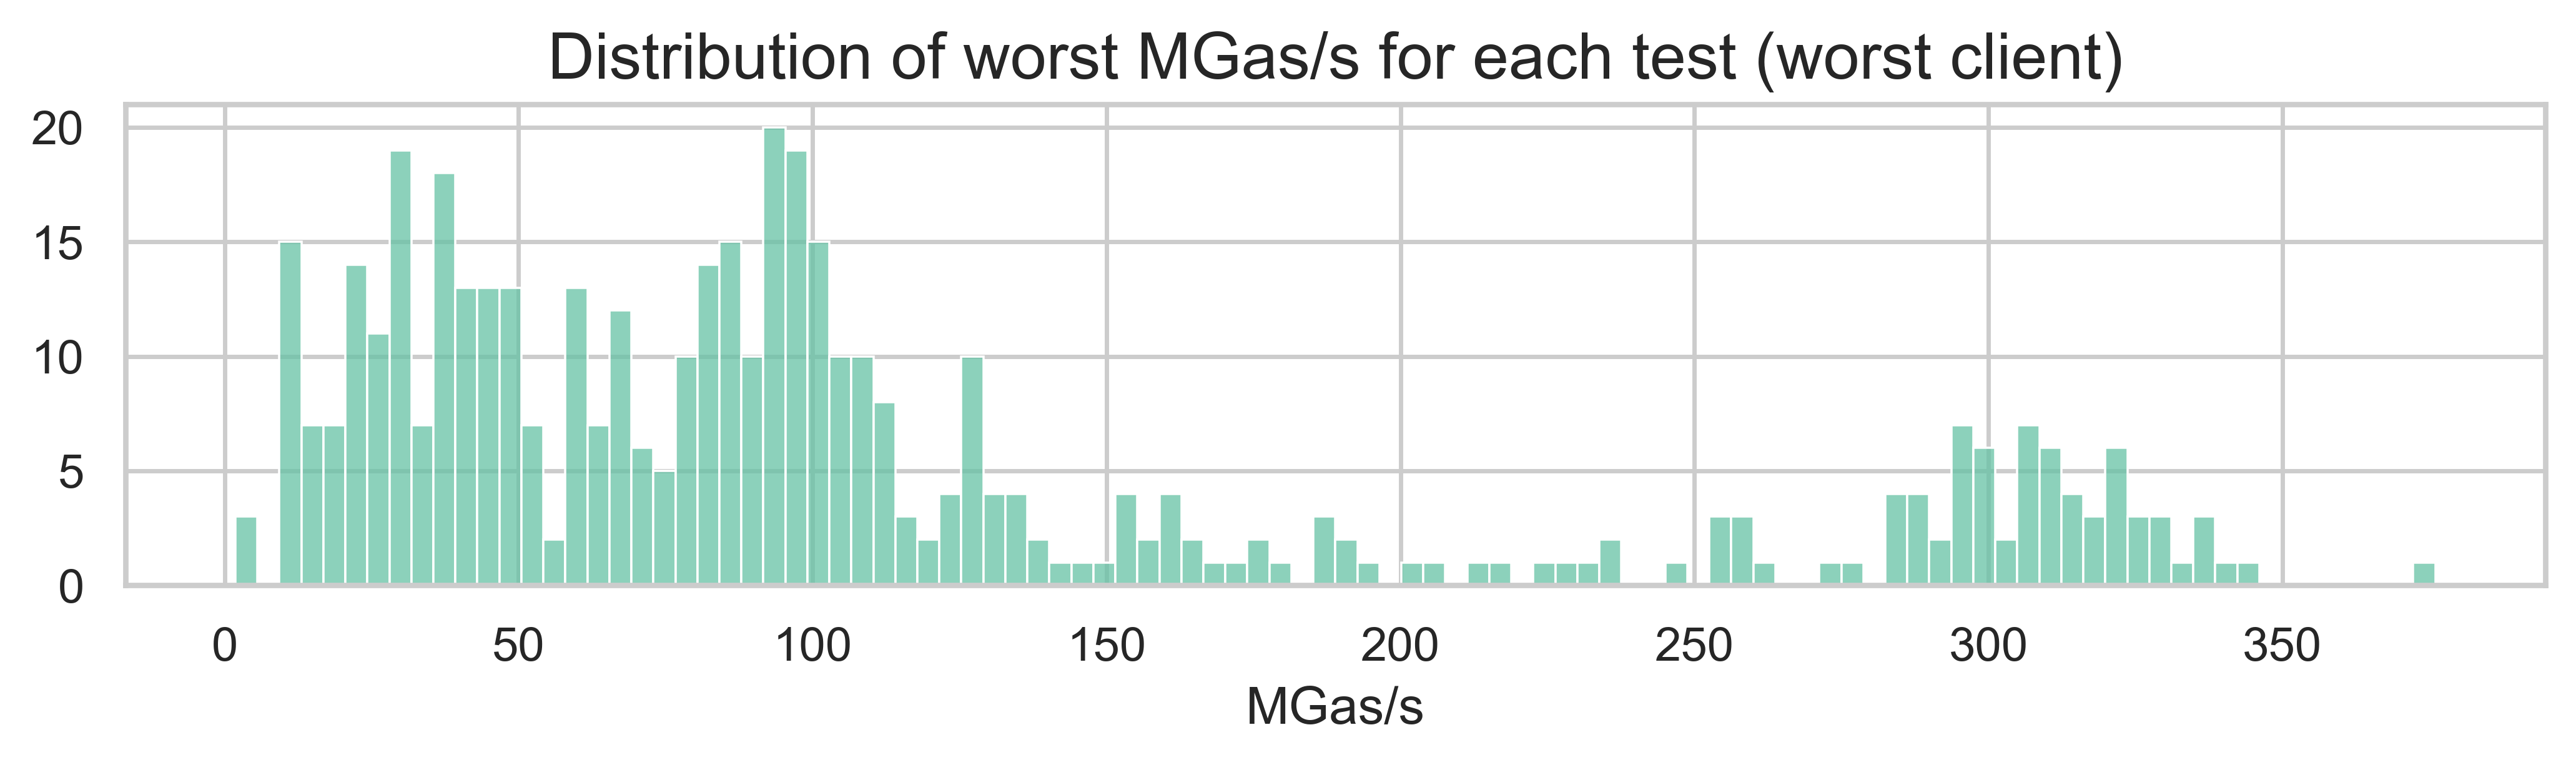

In [16]:
plt.figure(figsize=(10, 2))
sns.histplot(
    data=worse_df,
    x="mgas/s",
    bins=100
)
plt.title("Distribution of worst MGas/s for each test (worst client)")
plt.ylabel("")
plt.xlabel("MGas/s")
plt.show()

In [17]:
worse_df.sort_values("mgas/s").head(10)

test_file                         test_name  \
441  test_worst_stateful_opcodes  test_worst_selfdestruct_existing   
440  test_worst_stateful_opcodes  test_worst_selfdestruct_existing   
175           test_worst_compute                 test_worst_modexp   
118           test_worst_compute               test_worst_modarith   
117           test_worst_compute               test_worst_modarith   
105           test_worst_compute                    test_worst_mod   
104           test_worst_compute                    test_worst_mod   
108           test_worst_compute                    test_worst_mod   
116           test_worst_compute               test_worst_modarith   
109           test_worst_compute                    test_worst_mod   

                                test_params client  mgas/s test_fork  \
441                      value_bearing_True   besu    1.84    Prague   
440                     value_bearing_False   besu    1.95    Prague   
175    from_state_test-mod_vul_guido_3_even   besu    2.68    Prague   
118  from_state_test-op_MULMOD-mod_bits_255   besu    9.70    Prague   
117  from_state_test-op_MULMOD-mod_bits_191   besu    9.99    Prague   
105     from_state_test-op_MOD-mod_bits_191   besu   10.10    Prague   
104     from_state_test-op_MOD-mod_bits_127   besu   10.30    Prague   
108    from_state_test-op_SMOD-mod_bits_127   besu   10.30    Prague   
116  from_state_test-op_MULMOD-mod_bits_127   besu   10.90    Prague   
109    from_state_test-op_SMOD-mod_bits_191   besu   10.90    Prague   

      test_opcode  
441  SELFDESTRUCT  
440  SELFDESTRUCT  
175        MODEXP  
118        MULMOD  
117        MULMOD  
105           MOD  
104           MOD  
108          SMOD  
116        MULMOD  
109          SMOD

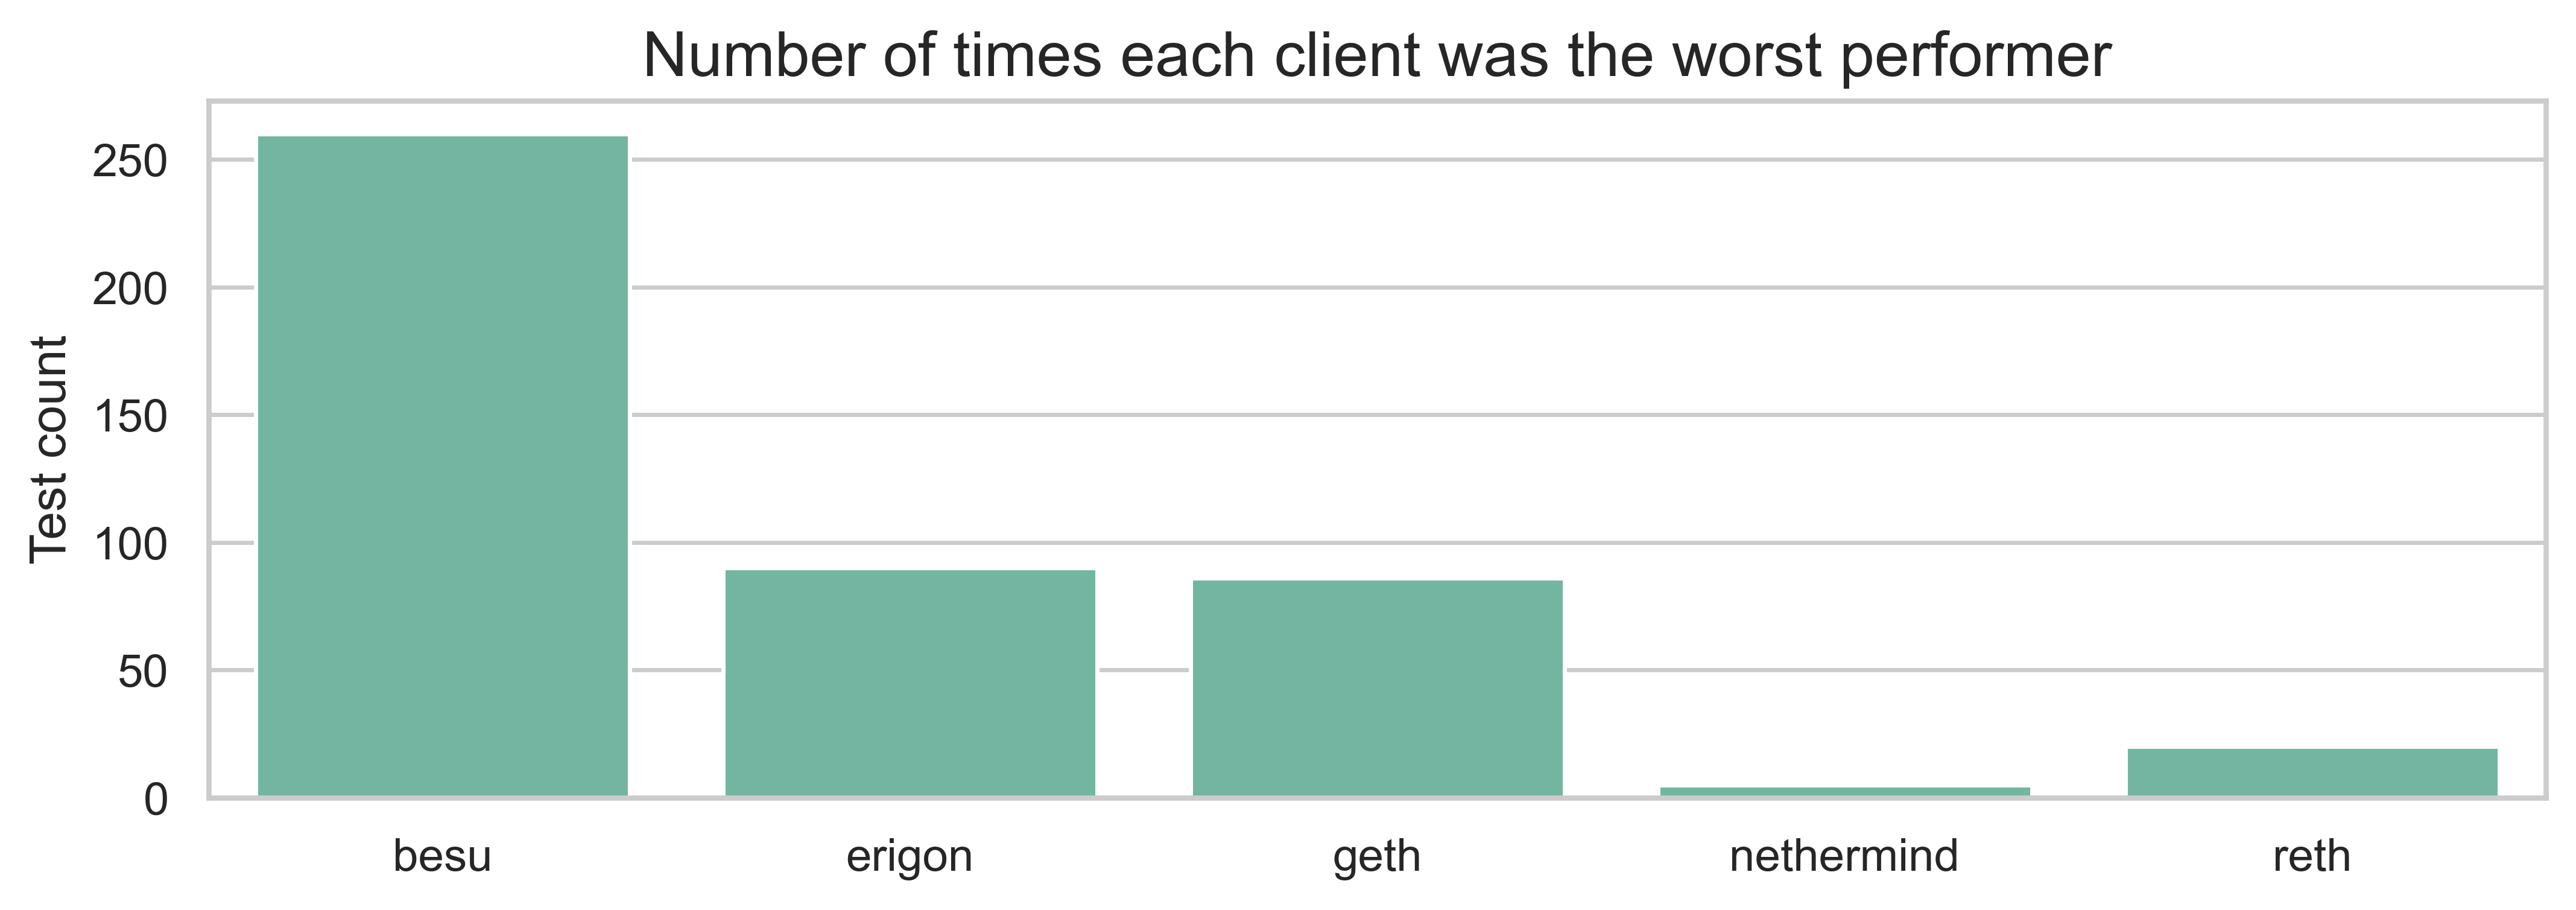

In [18]:
plt.figure(figsize=(10, 3))
sns.countplot(worse_df.sort_values("client"), x="client")
plt.title("Number of times each client was the worst performer")
plt.xlabel("")
plt.ylabel("Test count")
plt.show()

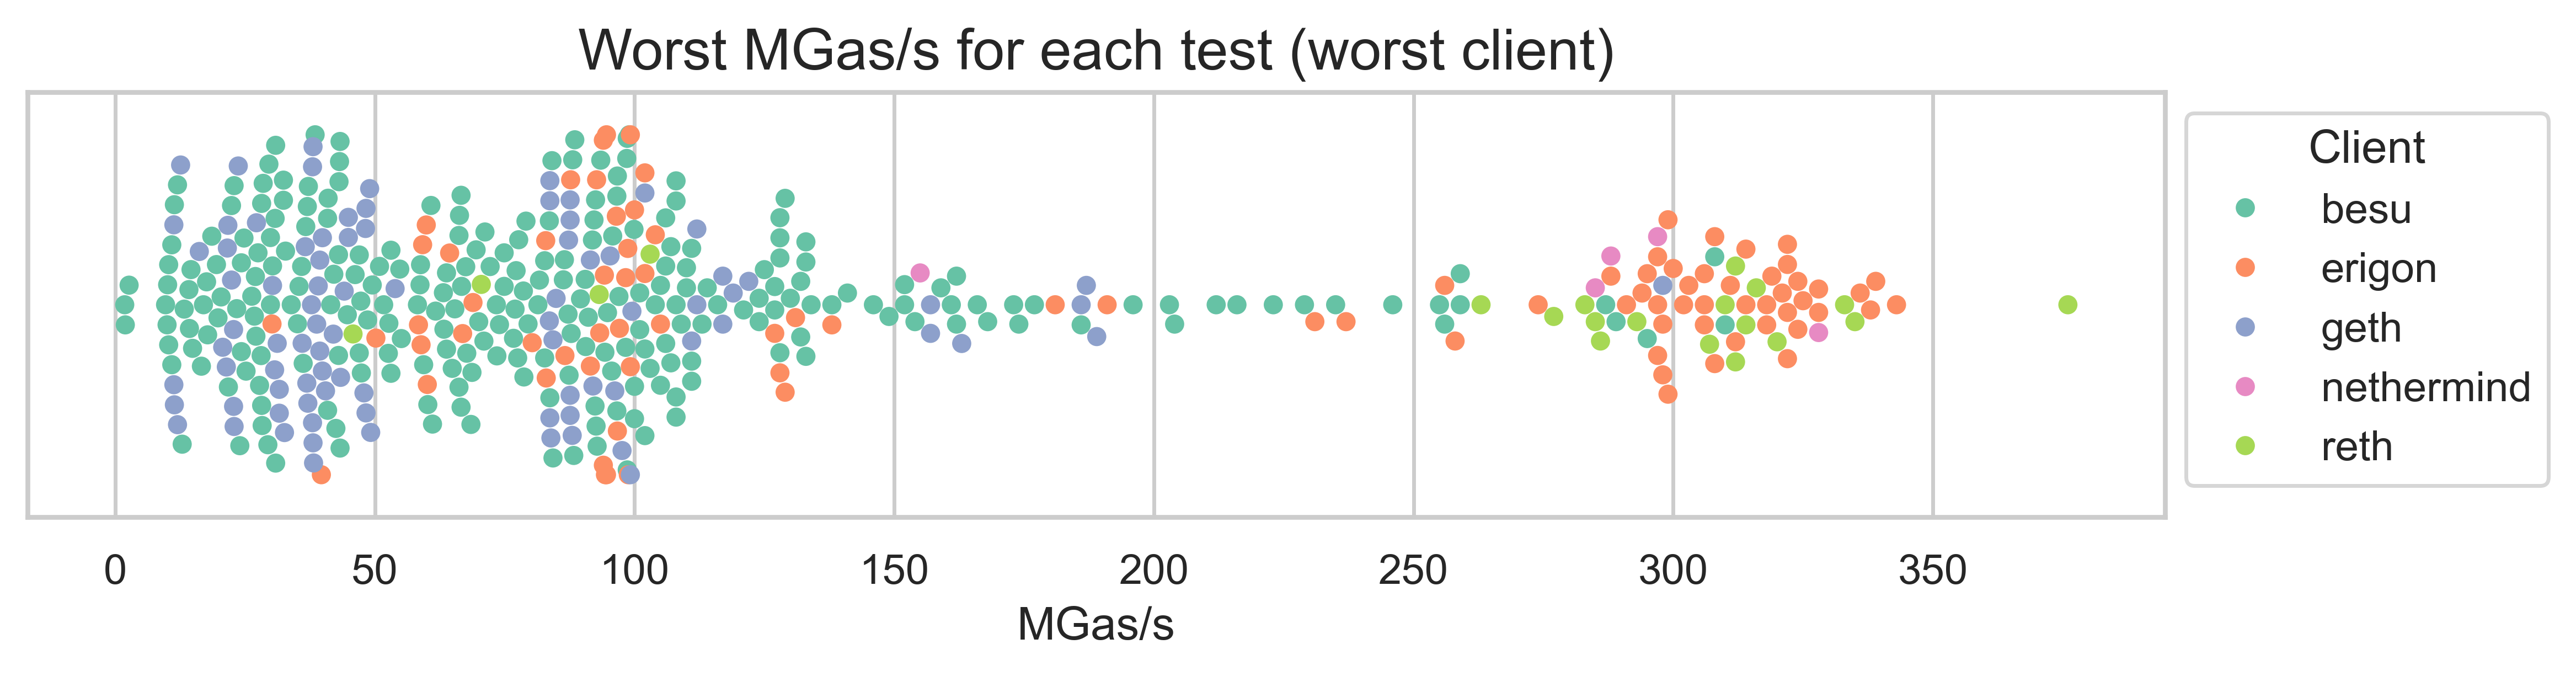

In [19]:
plt.figure(figsize=(10, 2))
sns.swarmplot(
    data=worse_df.sort_values("client"),
    x="mgas/s",
    hue="client"
)
plt.title("Worst MGas/s for each test (worst client)")
plt.ylabel("")
plt.xlabel("MGas/s")
plt.legend(title="Client", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

In [7]:
sum(worse_df["mgas/s"]>55)/len(worse_df)

0.6789587852494577

In [8]:
sum(worse_df["mgas/s"]>100)/len(worse_df)

0.3752711496746204

## Worse time per operation

In [20]:
worse_v2_df = df.groupby(["test_file", "test_opcode"]).first().reset_index()

worse_v2_df["mgas/s"].describe().T.round(2)

count    156.00
mean      83.15
std       46.15
min        1.84
25%       52.38
50%       85.30
75%      102.00
max      376.00
Name: mgas/s, dtype: float64

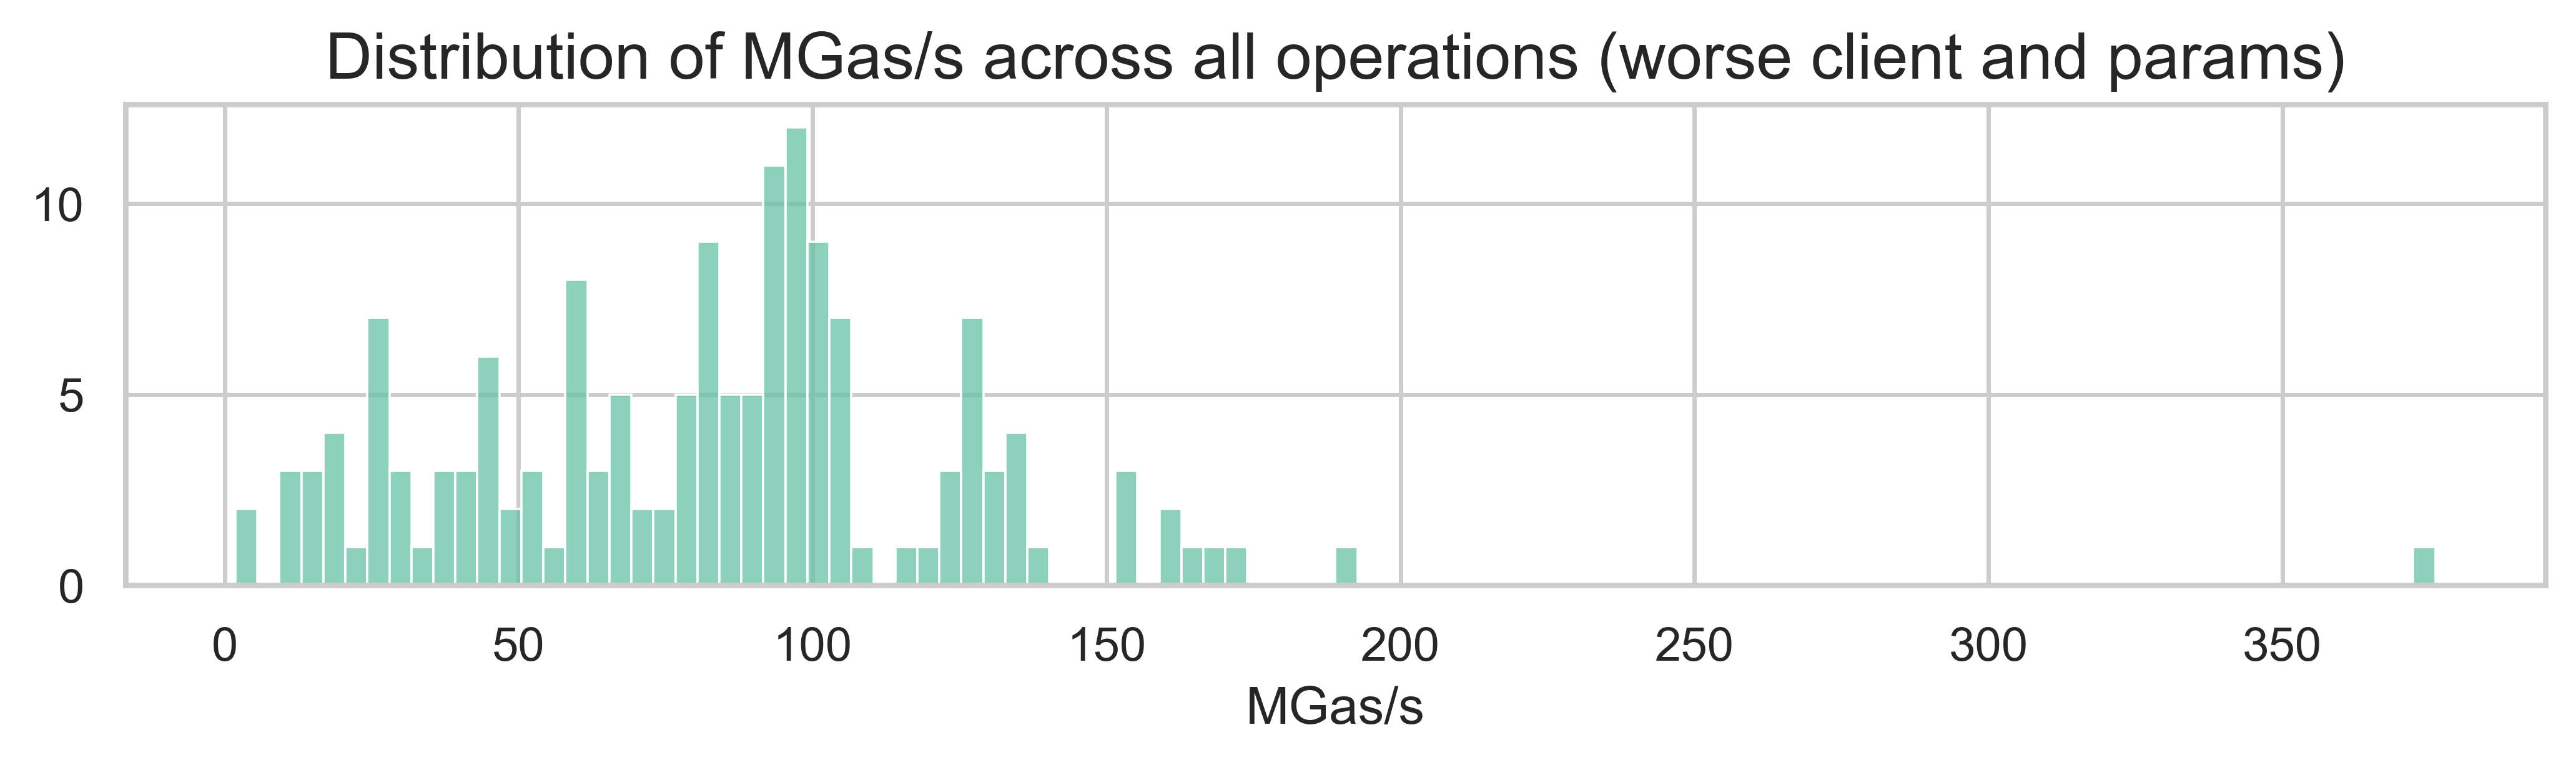

In [21]:
plt.figure(figsize=(10, 2))
sns.histplot(
    data=worse_v2_df,
    x="mgas/s",
    bins=100
)
plt.title("Distribution of MGas/s across all operations (worse client and params)")
plt.ylabel("")
plt.xlabel("MGas/s")
plt.show()

In [22]:
worse_v2_df.sort_values("mgas/s")

test_file   test_opcode  client  mgas/s  \
152  test_worst_stateful_opcodes  SELFDESTRUCT    besu    1.84   
53            test_worst_compute        MODEXP    besu    2.68   
58            test_worst_compute        MULMOD    besu    9.70   
52            test_worst_compute           MOD    besu   10.10   
109           test_worst_compute          SMOD    besu   10.30   
..                           ...           ...     ...     ...   
118           test_worst_compute        SWAP16    besu  166.00   
129           test_worst_compute        TSTORE    besu  168.00   
117           test_worst_compute        SWAP15    besu  173.00   
128           test_worst_compute         TLOAD  erigon  191.00   
144  test_worst_stateful_opcodes     BLOCKHASH    reth  376.00   

                            test_name  \
152  test_worst_selfdestruct_existing   
53                  test_worst_modexp   
58                test_worst_modarith   
52                     test_worst_mod   
109                    test_worst_mod   
..                                ...   
118                   test_worst_swap   
129                 test_worst_tstore   
117                   test_worst_swap   
128                  test_worst_tload   
144              test_worst_blockhash   

                                          test_params test_fork  
152                                value_bearing_True    Prague  
53               from_state_test-mod_vul_guido_3_even    Prague  
58             from_state_test-op_MULMOD-mod_bits_255    Prague  
52                from_state_test-op_MOD-mod_bits_191    Prague  
109              from_state_test-op_SMOD-mod_bits_127    Prague  
..                                                ...       ...  
118                     from_state_test-opcode_SWAP16    Prague  
129  from_state_test-dense_val_mut_True-key_mut_False    Prague  
117                     from_state_test-opcode_SWAP15    Prague  
128        from_state_test-val_mut_True-key_mut_False    Prague  
144                                                      Prague  

[156 rows x 7 columns]

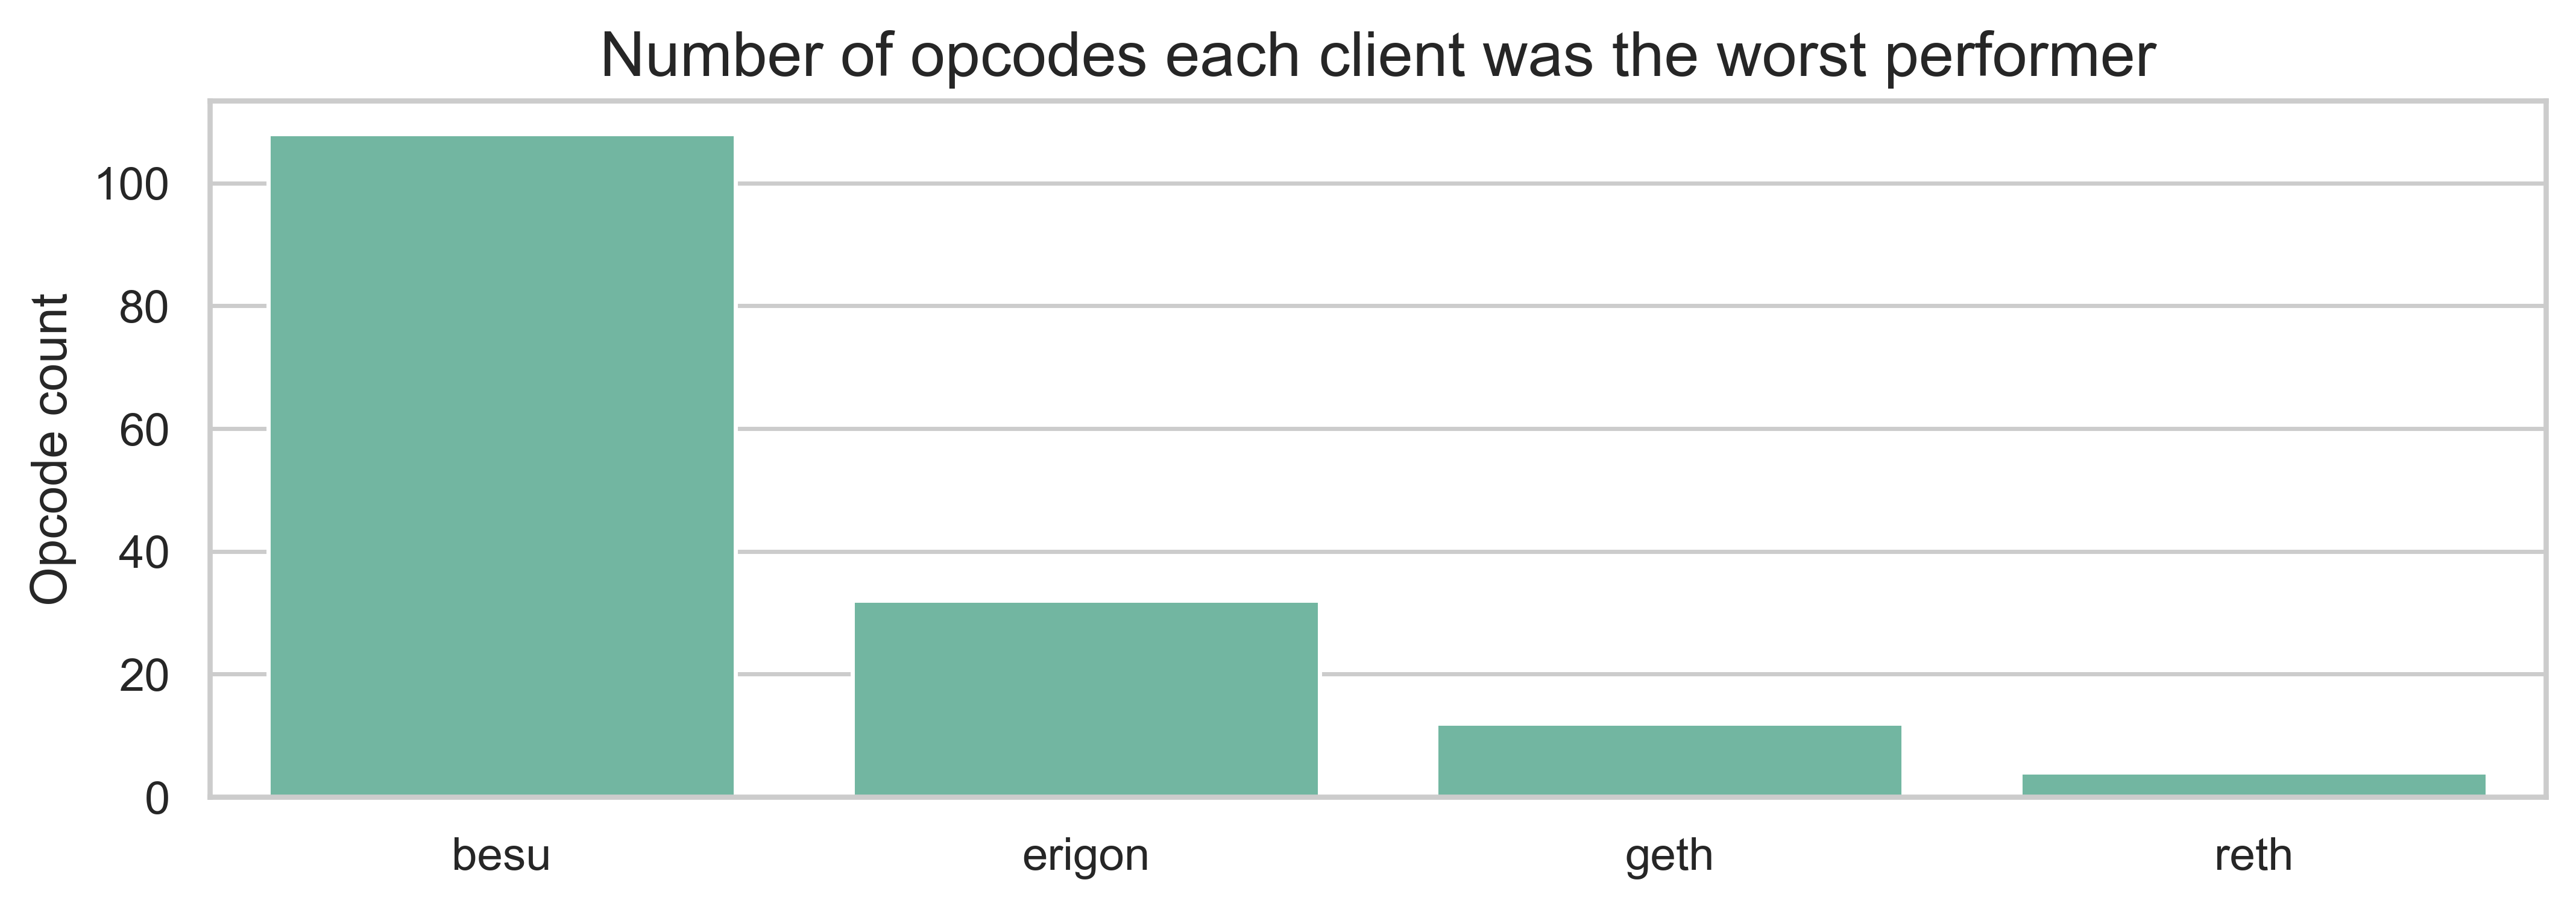

In [23]:
plt.figure(figsize=(10, 3))
sns.countplot(worse_v2_df.sort_values("client"), x="client")
plt.title("Number of opcodes each client was the worst performer")
plt.xlabel("")
plt.ylabel("Opcode count")
plt.show()

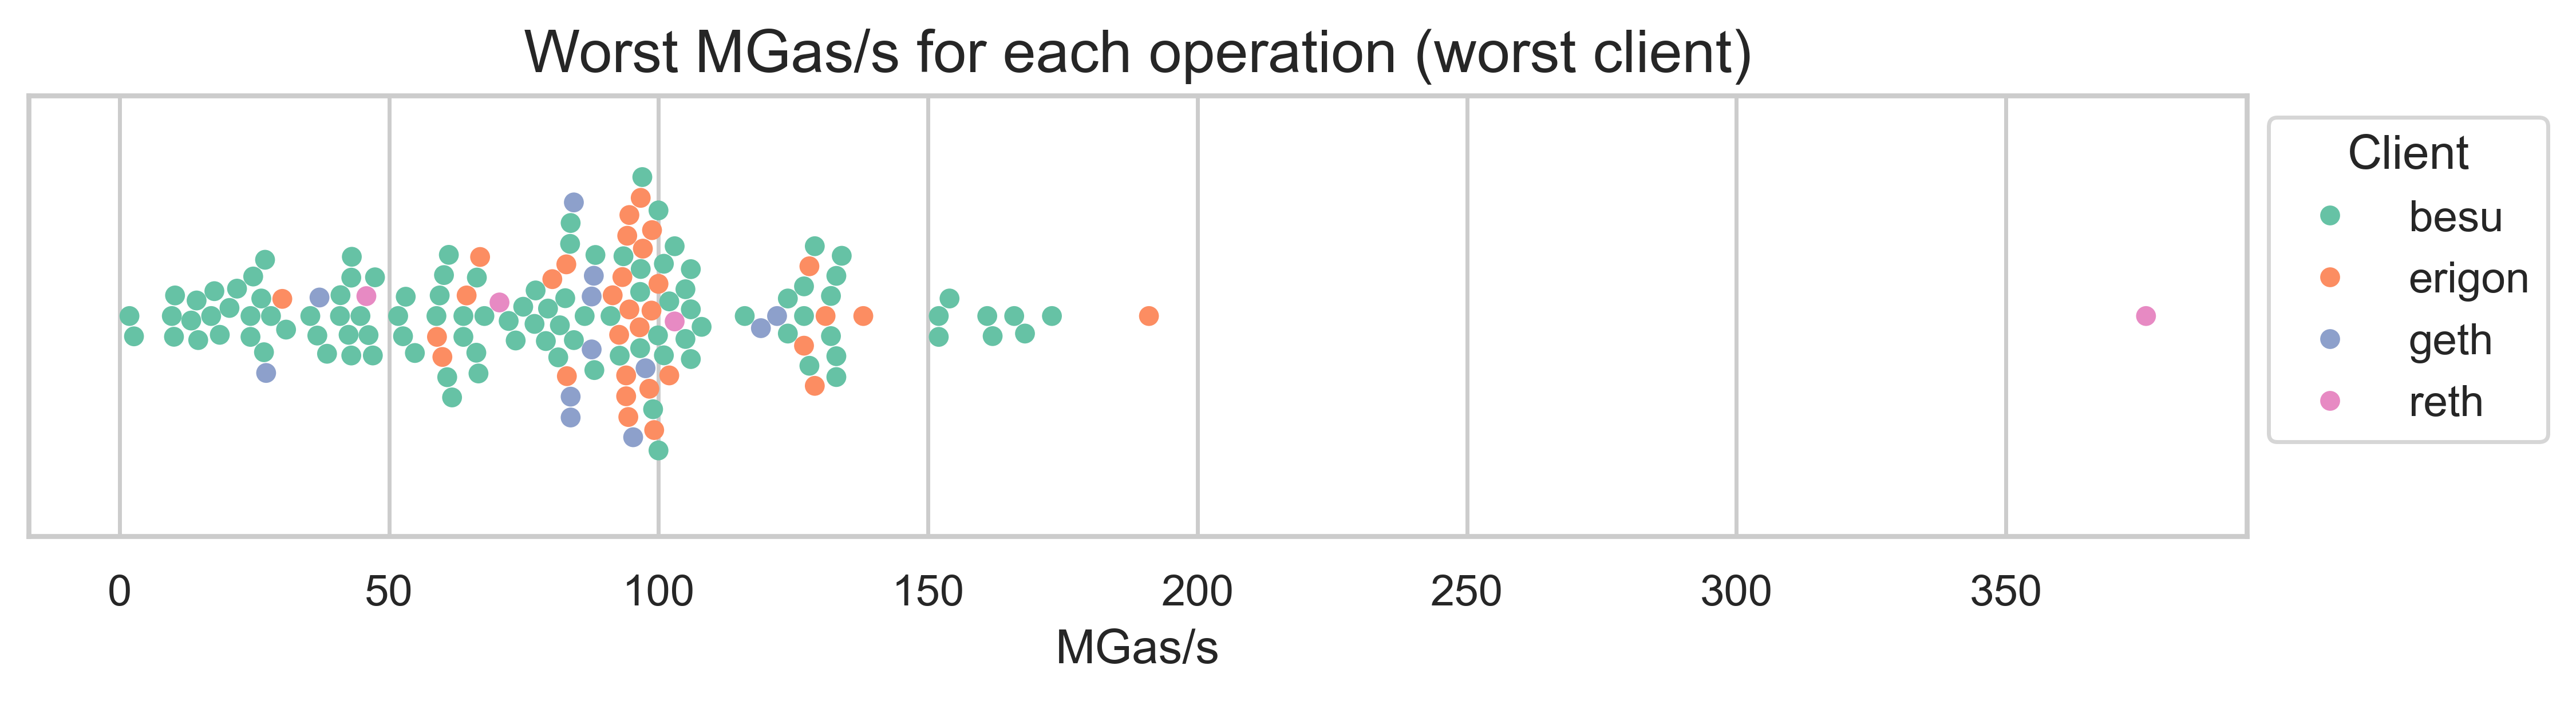

In [24]:
plt.figure(figsize=(10, 2))
sns.swarmplot(
    data=worse_v2_df.sort_values("client"),
    x="mgas/s",
    hue="client"
)
plt.title("Worst MGas/s for each operation (worst client)")
plt.ylabel("")
plt.xlabel("MGas/s")
plt.legend(title="Client", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

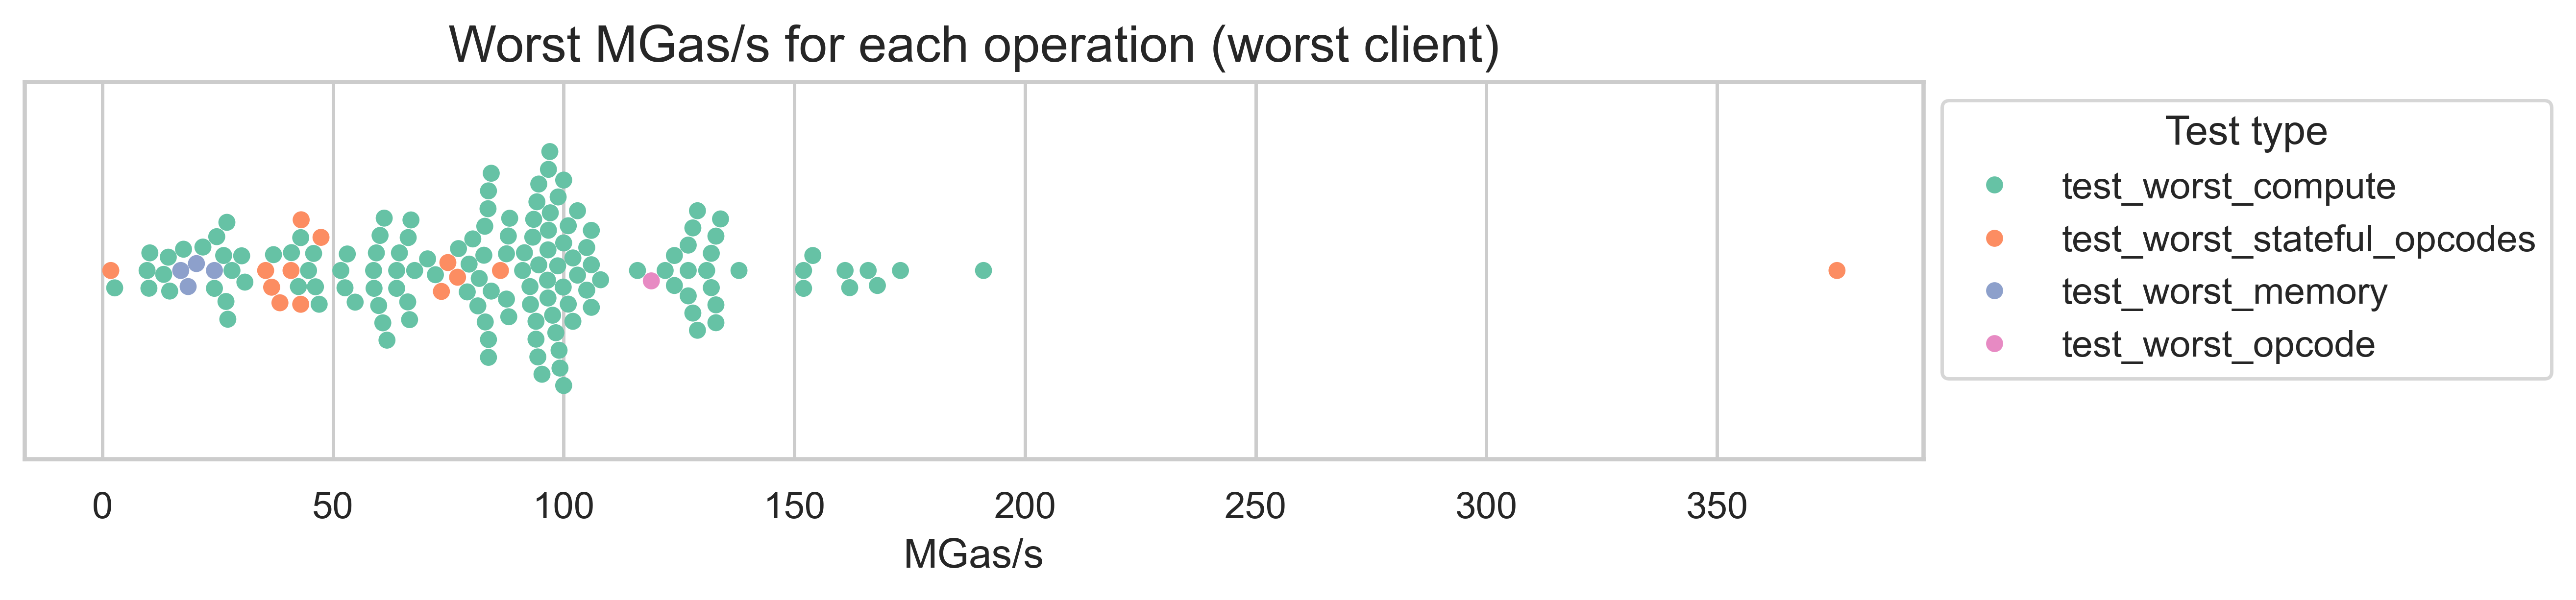

In [25]:
plt.figure(figsize=(10, 2))
sns.swarmplot(
    data=worse_v2_df.sort_values("client"),
    x="mgas/s",
    hue="test_file"
)
plt.title("Worst MGas/s for each operation (worst client)")
plt.ylabel("")
plt.xlabel("MGas/s")
plt.legend(title="Test type", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

## Second worse time per operation

In [26]:
worse_v3_df = (
    df.groupby(["test_file", "test_opcode", "client"])
    .first()
    .reset_index()
    .sort_values("mgas/s")
    .groupby(["test_file", "test_opcode"])
    .nth(1)
)

worse_v3_df["mgas/s"].describe().T.round(2)

count    156.00
mean     109.87
std       46.99
min       11.30
25%       85.68
50%      102.00
75%      133.00
max      380.00
Name: mgas/s, dtype: float64

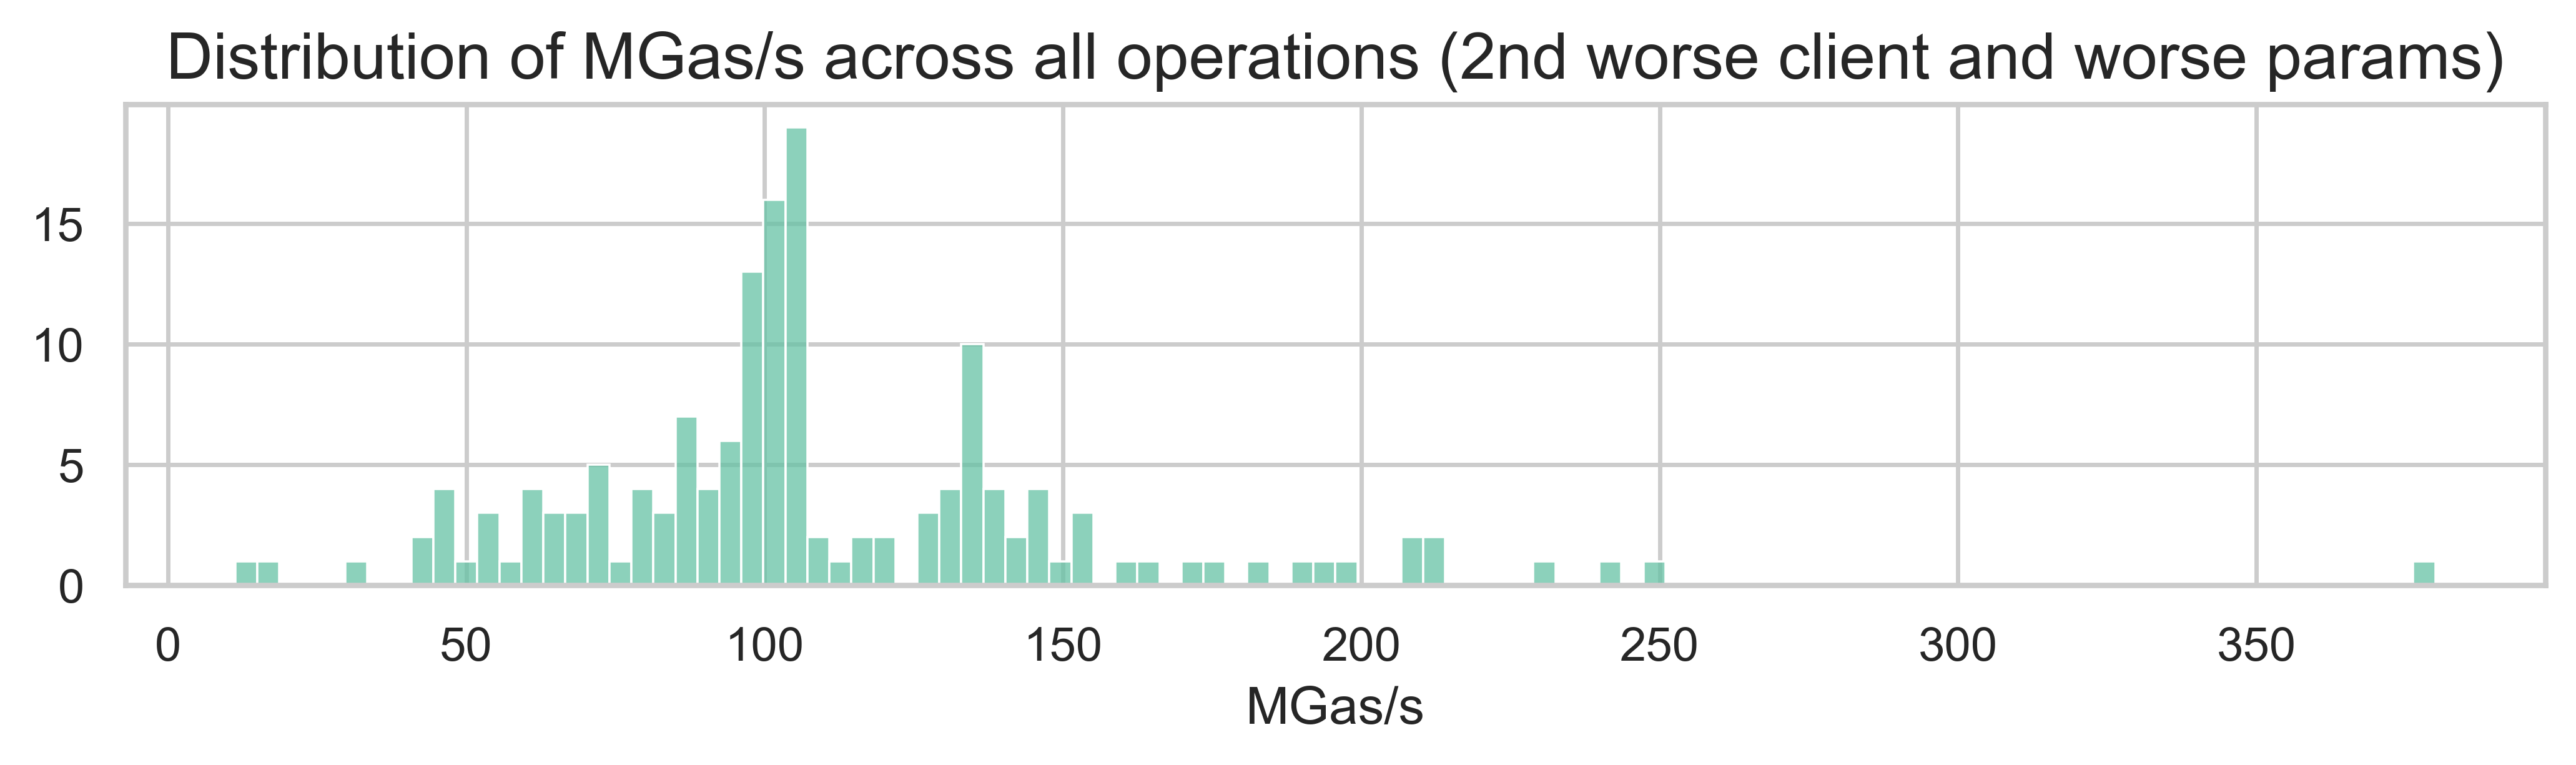

In [27]:
plt.figure(figsize=(10, 2))
sns.histplot(
    data=worse_v3_df,
    x="mgas/s",
    bins=100
)
plt.title("Distribution of MGas/s across all operations (2nd worse client and worse params)")
plt.ylabel("")
plt.xlabel("MGas/s")
plt.show()

In [28]:
worse_v3_df.sort_values("mgas/s")

test_file       test_opcode      client  mgas/s  \
267           test_worst_compute            MODEXP        geth    11.3   
662           test_worst_compute             ecAdd        geth    15.4   
689           test_worst_compute  point evaluation        reth    30.5   
293           test_worst_compute            MULMOD  nethermind    40.9   
548           test_worst_compute              SMOD  nethermind    44.0   
..                           ...               ...         ...     ...   
586           test_worst_compute            SWAP15      erigon   213.0   
710            test_worst_opcode               LOG        besu   229.0   
502           test_worst_compute        RIPEMD-160        geth   243.0   
640           test_worst_compute             TLOAD        besu   248.0   
720  test_worst_stateful_opcodes         BLOCKHASH        besu   380.0   

                                 test_name  \
267                      test_worst_modexp   
662       test_worst_precompile_fixed_cost   
689       test_worst_precompile_fixed_cost   
293                    test_worst_modarith   
548                         test_worst_mod   
..                                     ...   
586                        test_worst_swap   
710                 test_worst_log_opcodes   
502  test_worst_precompile_only_data_input   
640                       test_worst_tload   
720                   test_worst_blockhash   

                                           test_params test_fork  
267                from_state_test-mod_even_8b_exp_896    Prague  
662                          from_state_test-bn128_add    Prague  
689                   from_state_test-point_evaluation    Prague  
293             from_state_test-op_MULMOD-mod_bits_191    Prague  
548               from_state_test-op_SMOD-mod_bits_127    Prague  
..                                                 ...       ...  
586                      from_state_test-opcode_SWAP15    Prague  
710  from_state_test-fixed_offset_False-zeros_topic...    Prague  
502                         from_state_test-RIPEMD-160    Prague  
640          from_state_test-val_mut_True-key_mut_True    Prague  
720                                                       Prague  

[156 rows x 7 columns]

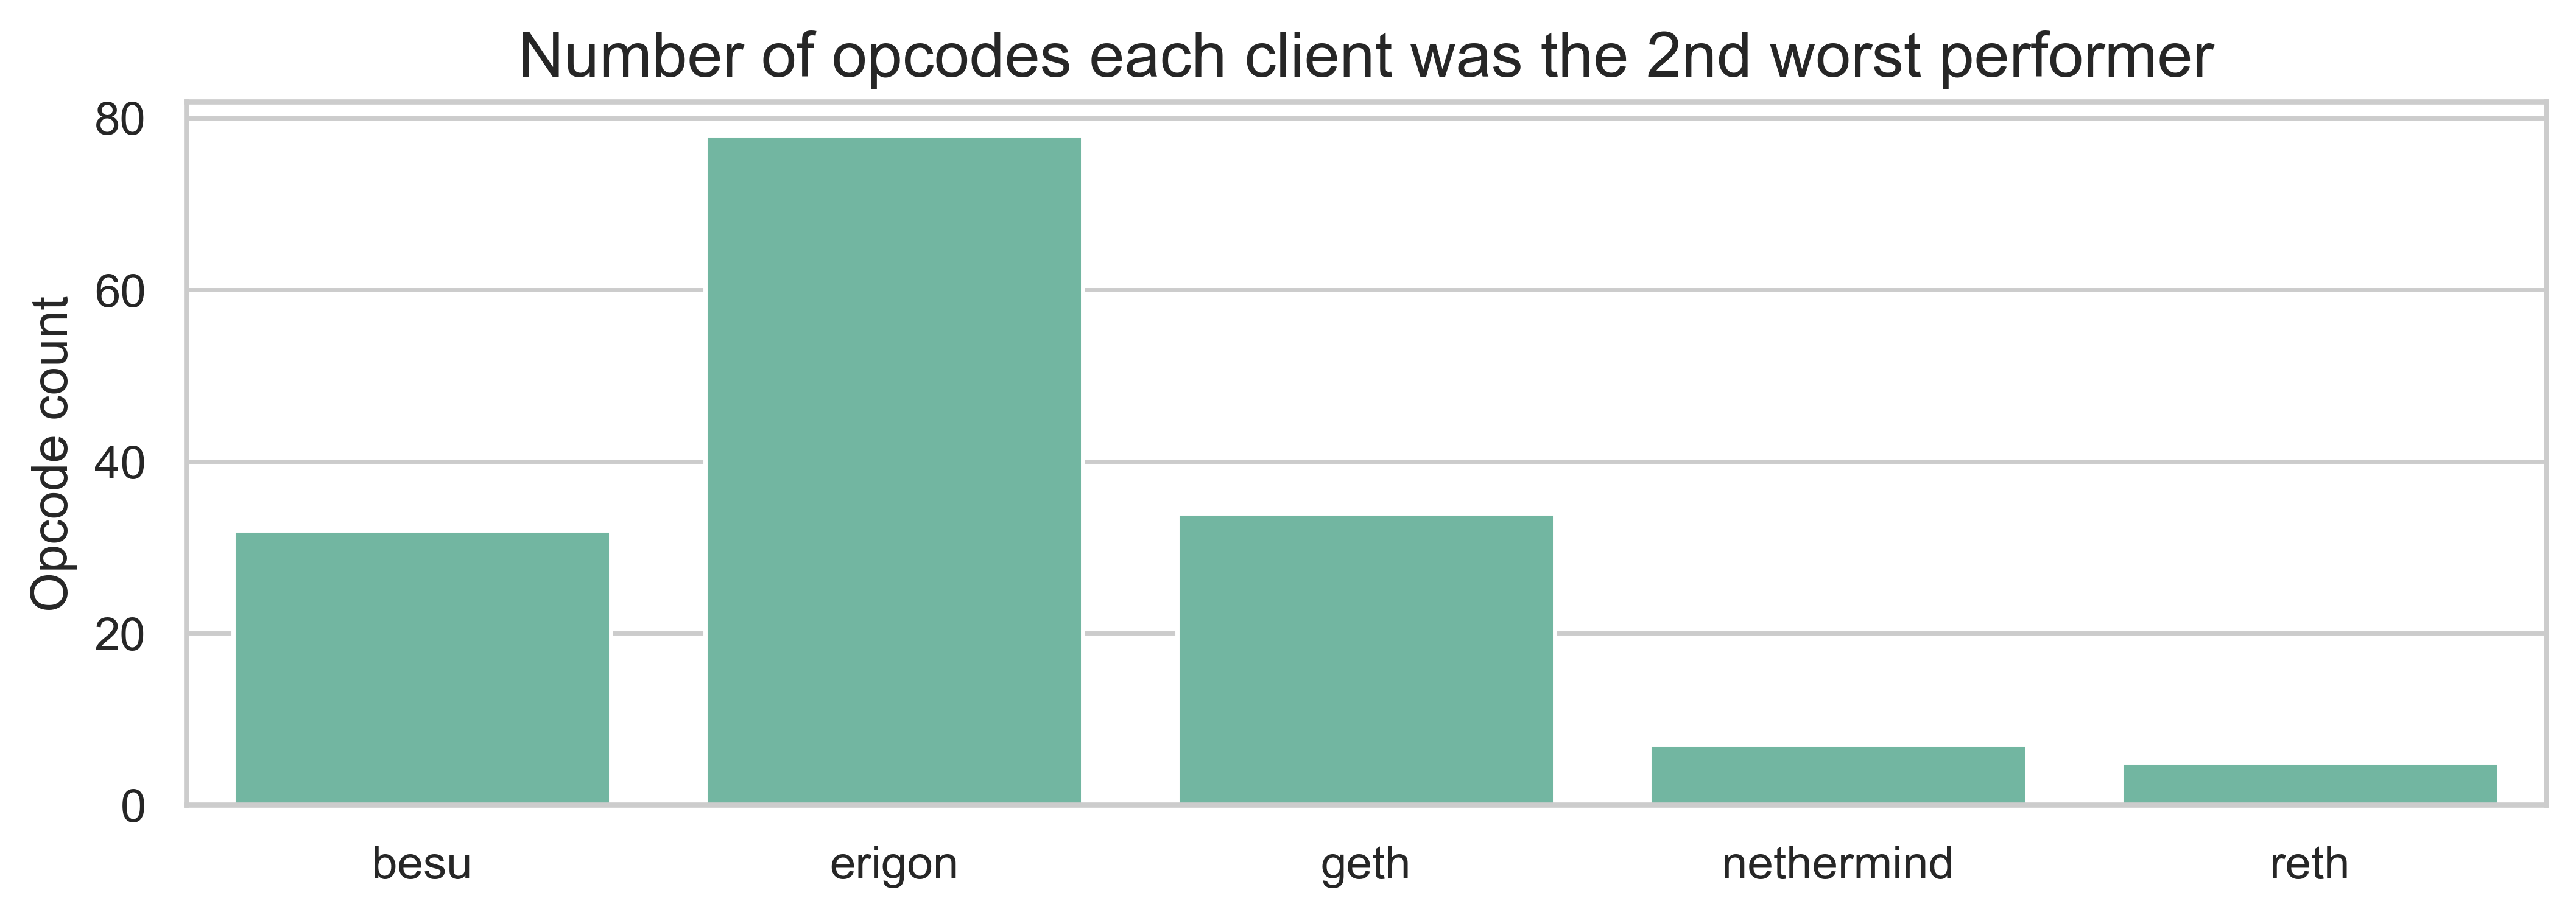

In [29]:
plt.figure(figsize=(10, 3))
sns.countplot(worse_v3_df.sort_values("client"), x="client")
plt.title("Number of opcodes each client was the 2nd worst performer")
plt.xlabel("")
plt.ylabel("Opcode count")
plt.show()

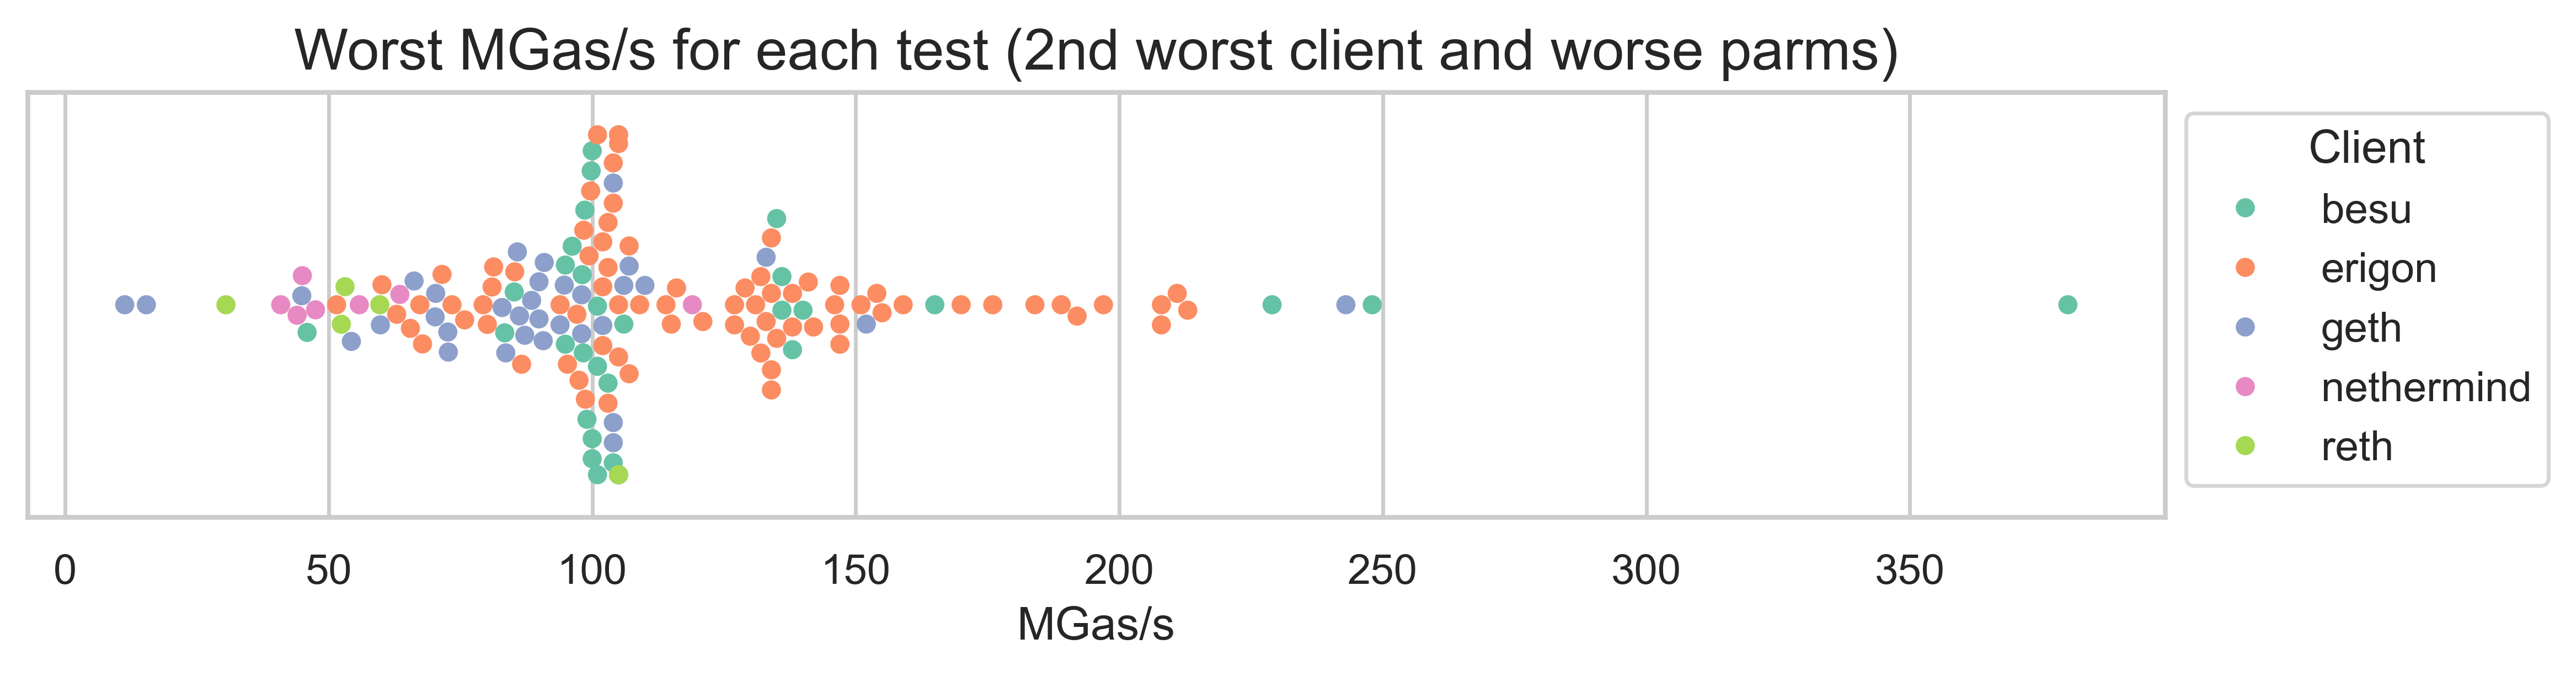

In [30]:
plt.figure(figsize=(10, 2))
sns.swarmplot(
    data=worse_v3_df.sort_values("client"),
    x="mgas/s",
    hue="client"
)
plt.title("Worst MGas/s for each test (2nd worst client and worse parms)")
plt.ylabel("")
plt.xlabel("MGas/s")
plt.legend(title="Client", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

## Worse vs. second worse

In [31]:
diff_df = (
    df.sort_values("mgas/s")
    .groupby(["test_file", "test_opcode", "test_params"])
    .head(2)  # get worst and second worst
    .sort_values(["test_file", "test_opcode", "test_params", "mgas/s"])
    .groupby(["test_file", "test_opcode", "test_params"])["mgas/s"]
    .apply(
        lambda x: pd.Series(
            {
                "second_worst_minus_worst": x.iloc[1] - x.iloc[0],
                "worst_mgas_s": x.iloc[0],
            }
        )
    )
    .reset_index()
    .pivot_table(
        index=["test_file", "test_opcode", "test_params"],
        columns="level_3",
        values="mgas/s",
    )
    .reset_index()
)
diff_df["second_worst_minus_worst_pct"] = (
    diff_df["second_worst_minus_worst"] / diff_df["worst_mgas_s"]
)
diff_df.describe()

level_3  second_worst_minus_worst  worst_mgas_s  second_worst_minus_worst_pct
count                  449.000000    449.000000                    449.000000
mean                    30.299421    113.501024                      0.979923
std                     33.404419     94.814423                      4.427379
min                      0.000000      1.840000                      0.000000
25%                      8.000000     42.500000                      0.054839
50%                     20.500000     87.700000                      0.234295
75%                     41.500000    132.000000                      0.629213
max                    264.100000    376.000000                     58.487179

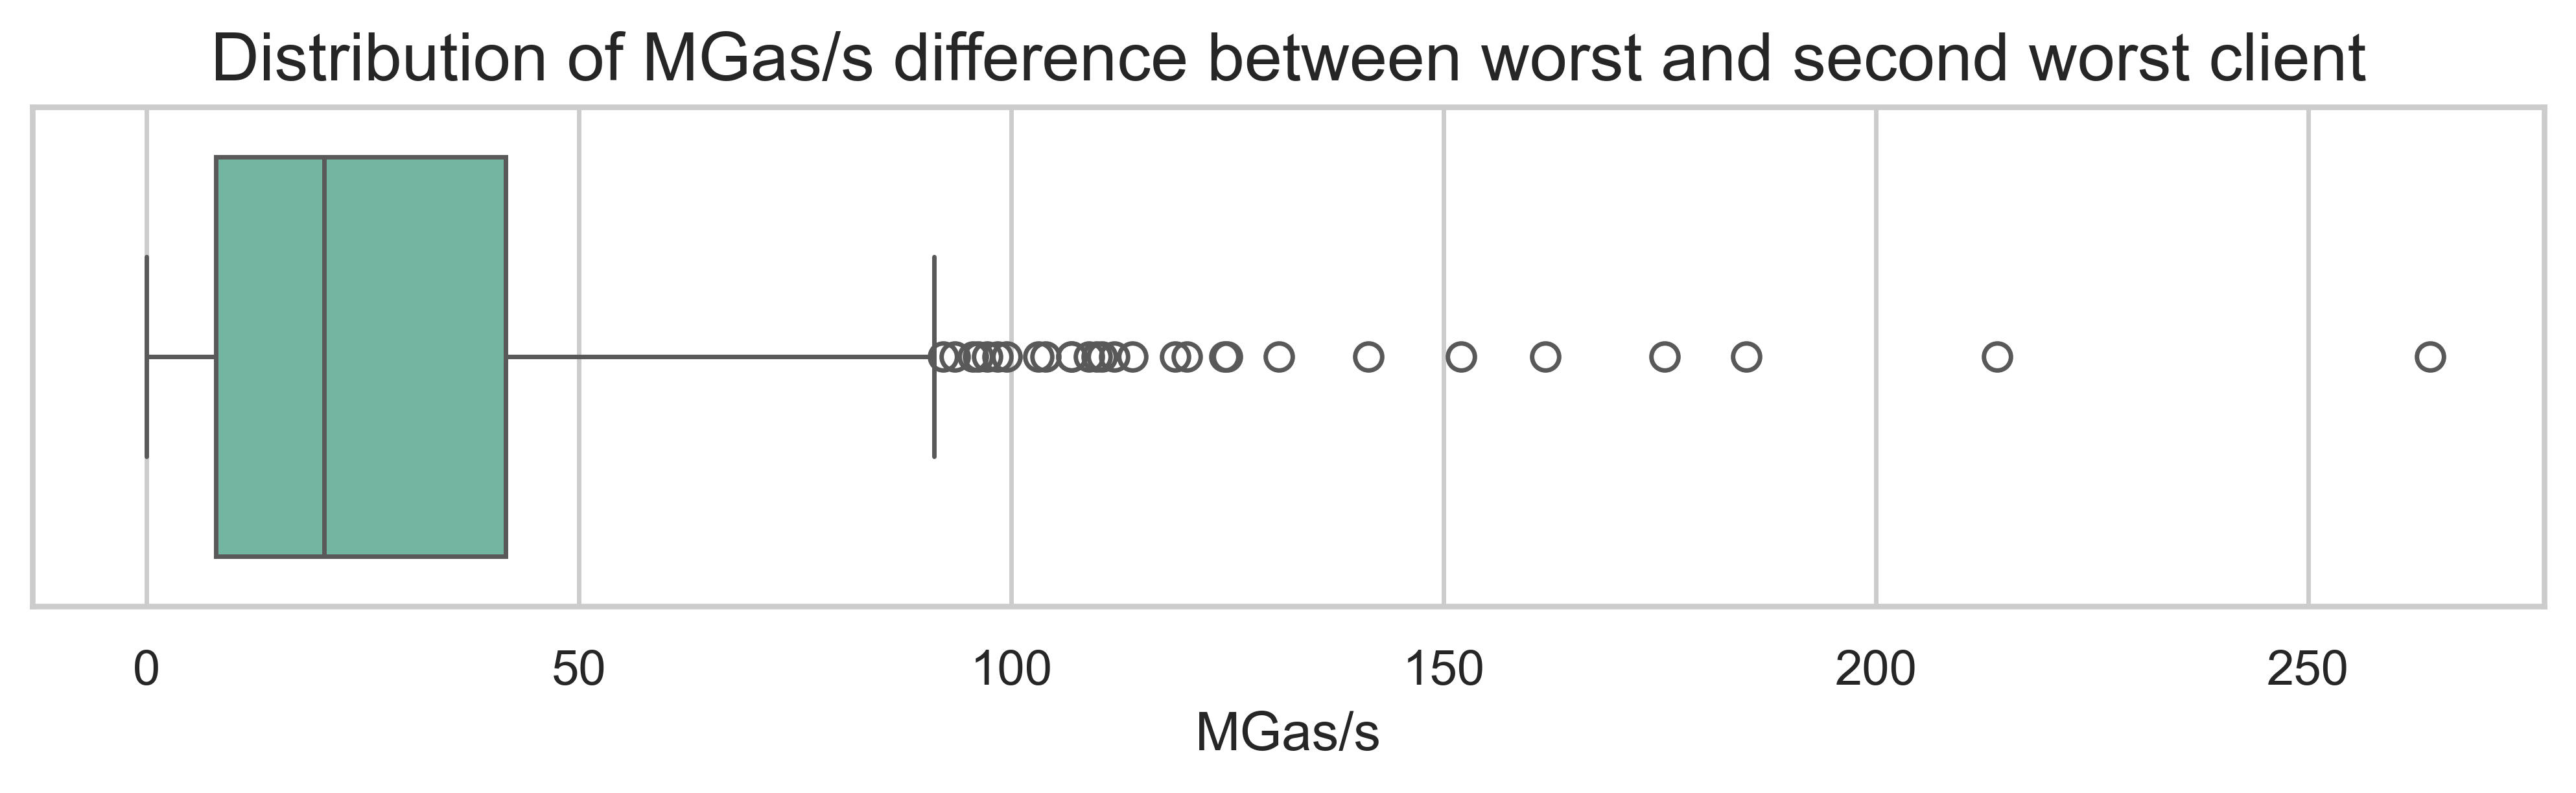

In [32]:
plt.figure(figsize=(10, 2))
sns.boxplot(
    data=diff_df,
    x="second_worst_minus_worst"
)
plt.title("Distribution of MGas/s difference between worst and second worst client")
plt.ylabel("")
plt.xlabel("MGas/s")
plt.show()

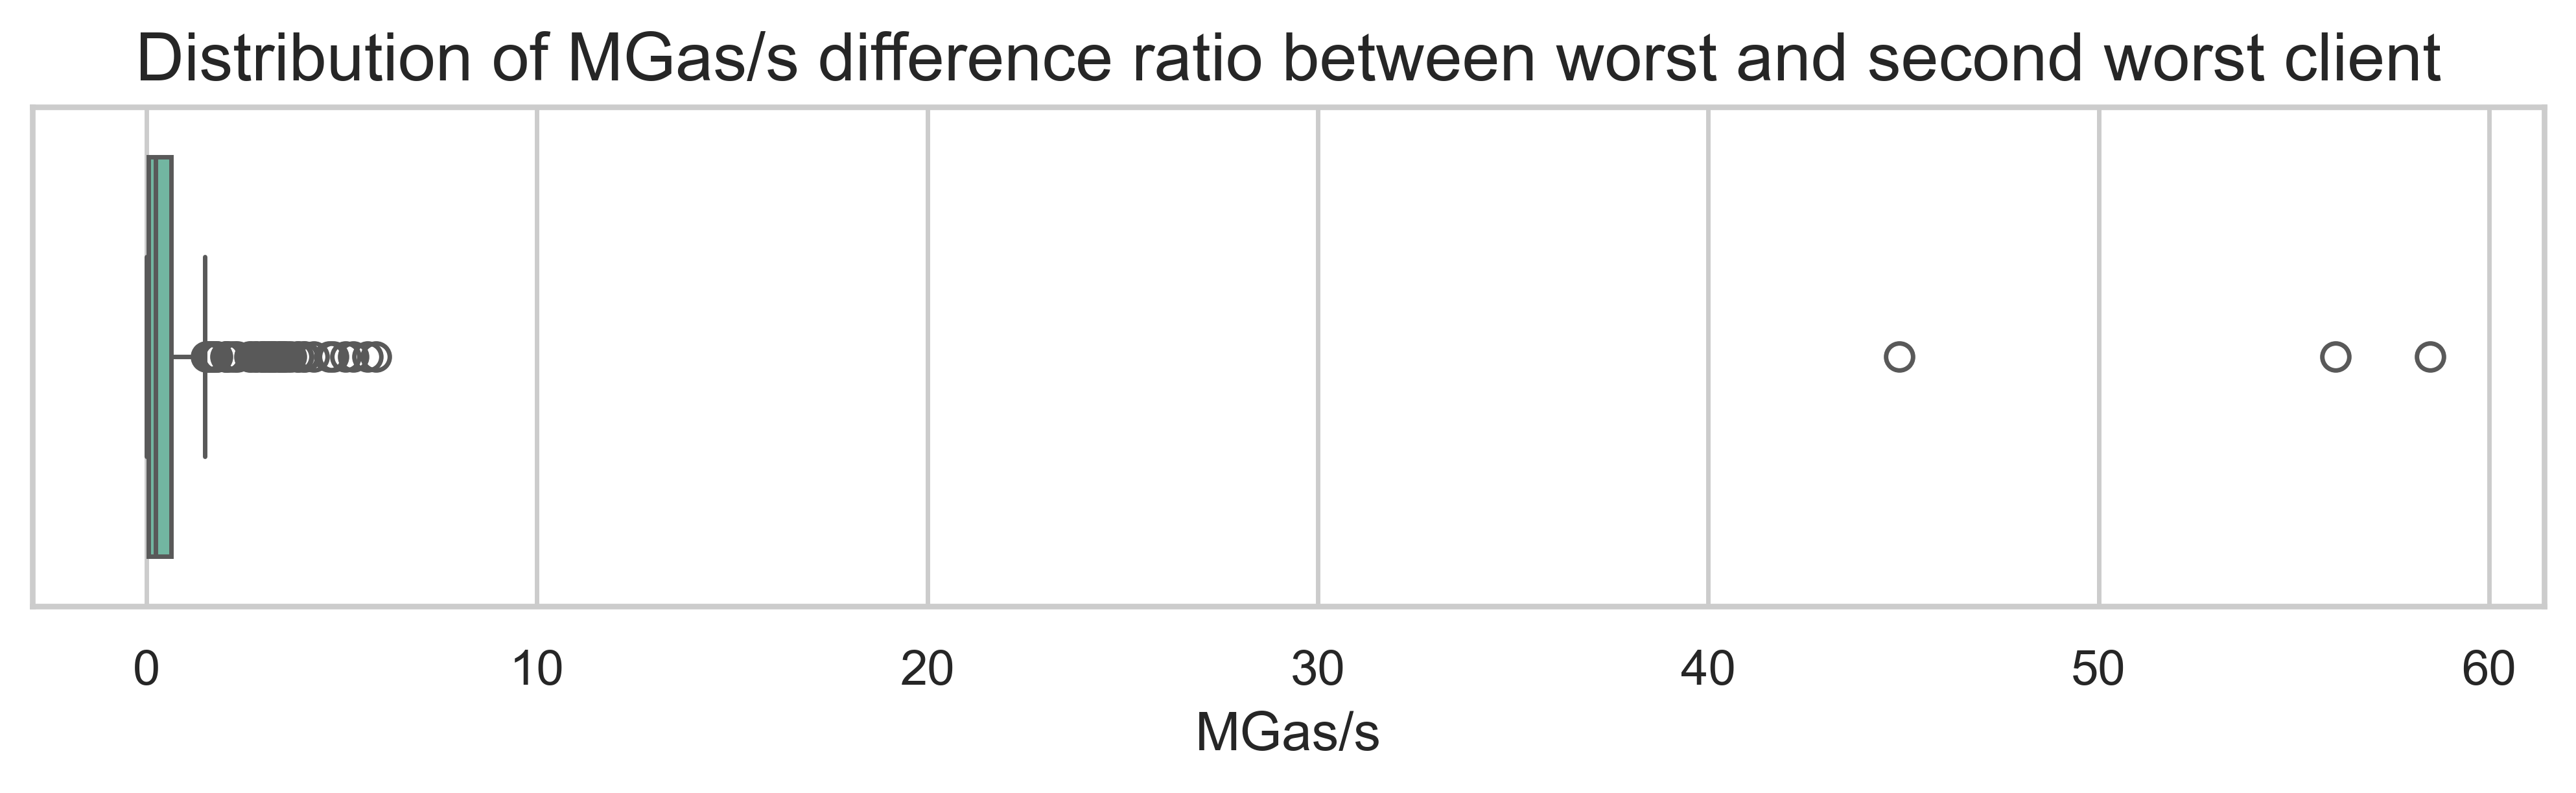

In [33]:
plt.figure(figsize=(10, 2))
sns.boxplot(
    data=diff_df,
    x="second_worst_minus_worst_pct"
)
plt.title("Distribution of MGas/s difference ratio between worst and second worst client")
plt.ylabel("")
plt.xlabel("MGas/s")
plt.show()

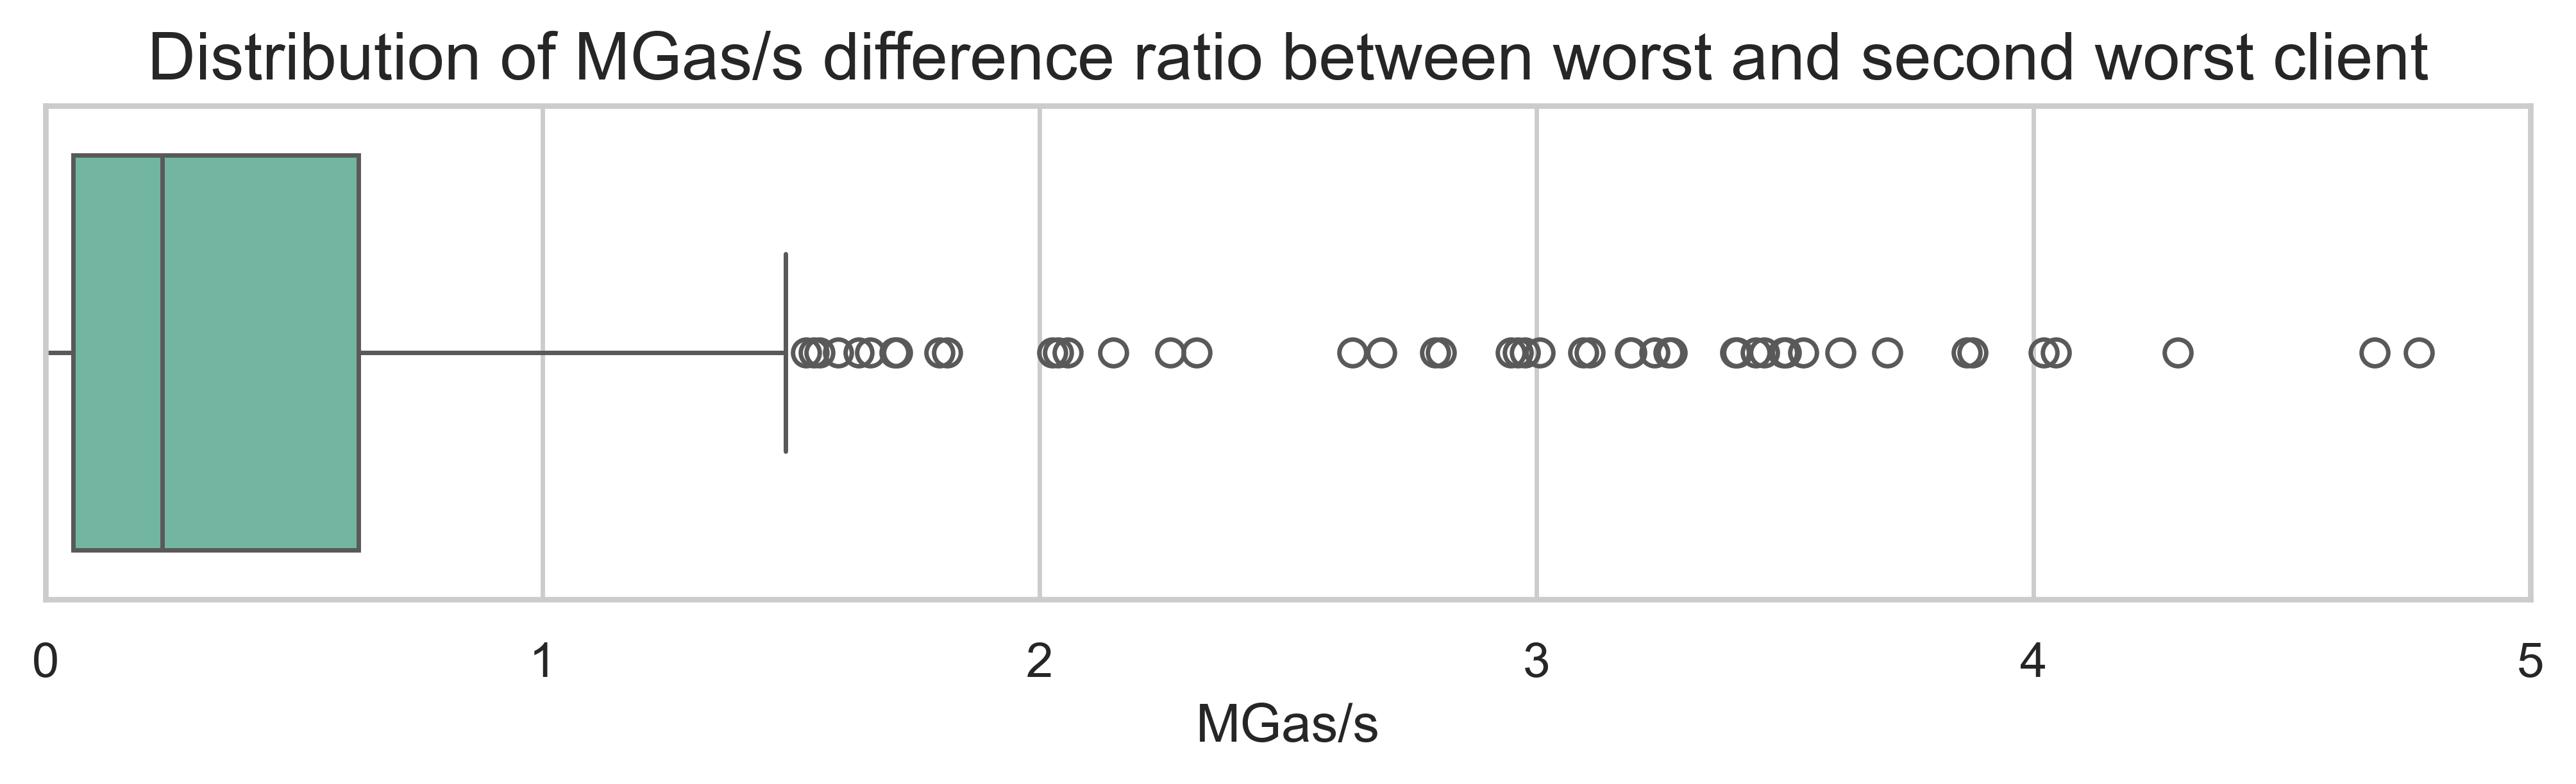

In [34]:
plt.figure(figsize=(10, 2))
sns.boxplot(
    data=diff_df,
    x="second_worst_minus_worst_pct"
)
plt.xlim(0,5)
plt.title("Distribution of MGas/s difference ratio between worst and second worst client")
plt.ylabel("")
plt.xlabel("MGas/s")
plt.show()

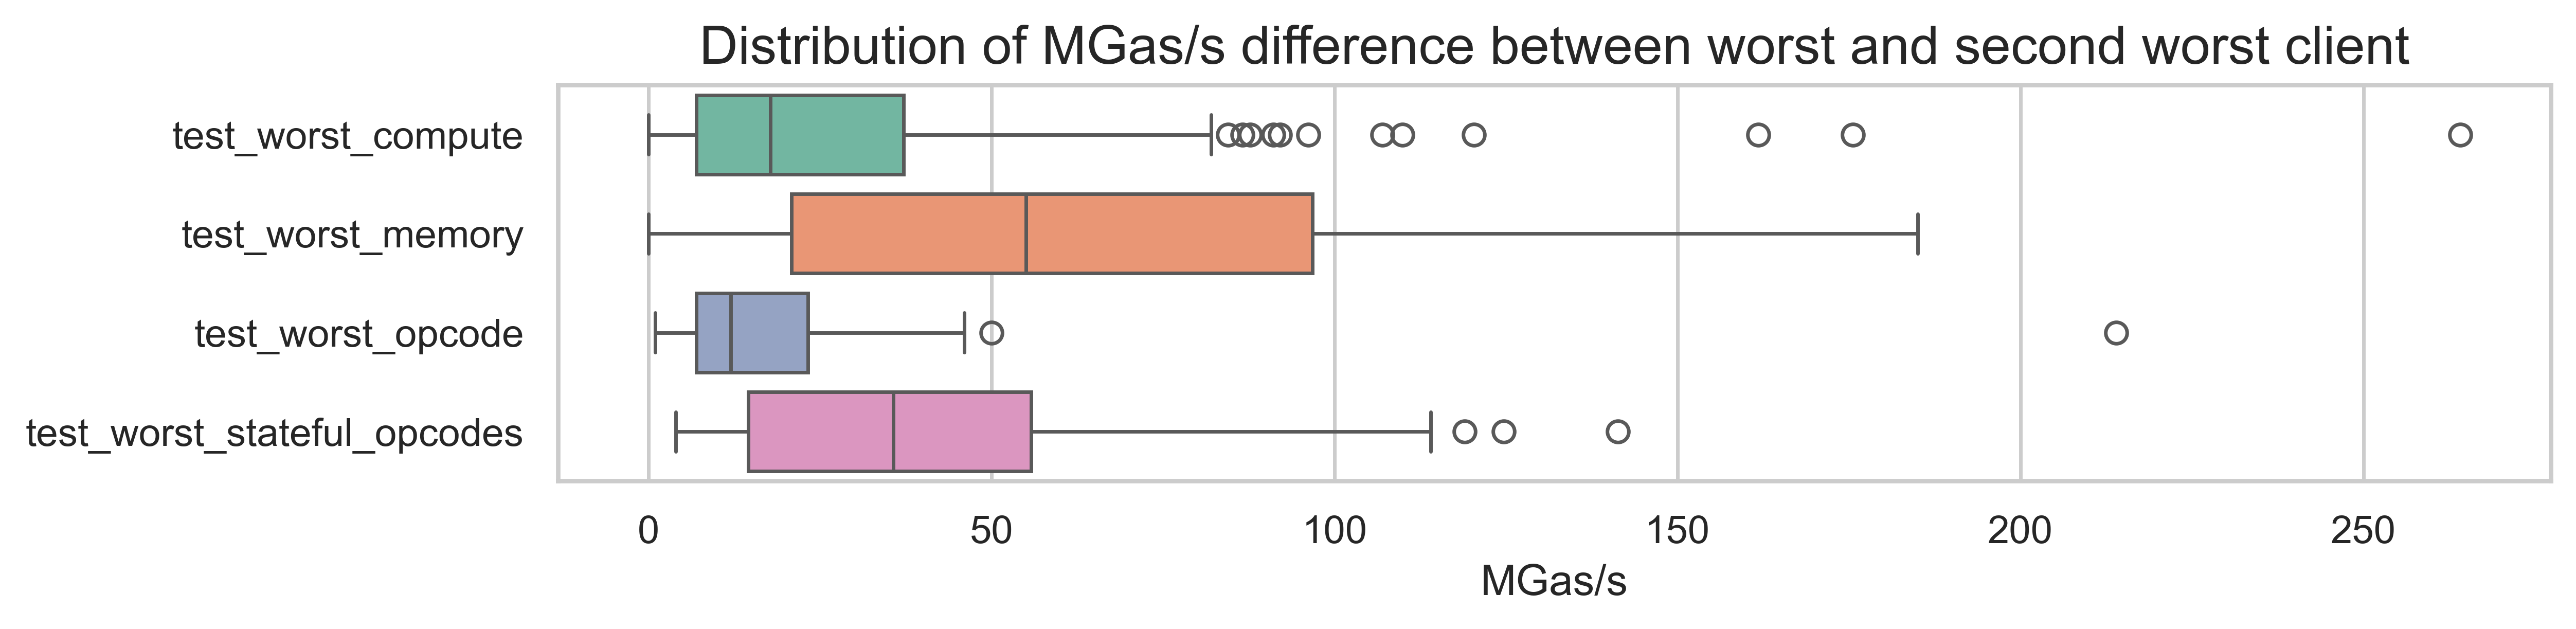

In [35]:
plt.figure(figsize=(10, 2))
sns.boxplot(
    data=diff_df,
    x="second_worst_minus_worst",
    y="test_file",
    hue="test_file"
)
plt.title("Distribution of MGas/s difference between worst and second worst client")
plt.ylabel("")
plt.xlabel("MGas/s")
plt.show()

In [36]:
diff_df[diff_df["second_worst_minus_worst"]>75].sort_values("second_worst_minus_worst", ascending=False)

level_3                    test_file     test_opcode  \
299               test_worst_compute       ecPairing   
385                test_worst_opcode             LOG   
328                test_worst_memory        CODECOPY   
134               test_worst_compute          MODEXP   
247               test_worst_compute        SHA2-256   
334                test_worst_memory        CODECOPY   
409      test_worst_stateful_opcodes         BALANCE   
327                test_worst_memory        CODECOPY   
331                test_worst_memory        CODECOPY   
419      test_worst_stateful_opcodes     EXTCODECOPY   
137               test_worst_compute          MODEXP   
421      test_worst_stateful_opcodes     EXTCODEHASH   
428      test_worst_stateful_opcodes    SELFDESTRUCT   
342                test_worst_memory  RETURNDATACOPY   
336                test_worst_memory           MCOPY   
292               test_worst_compute           ecMul   
326                test_worst_memory        CODECOPY   
418      test_worst_stateful_opcodes     EXTCODECOPY   
301               test_worst_compute        identity   
333                test_worst_memory        CODECOPY   
429      test_worst_stateful_opcodes    SELFDESTRUCT   
305                test_worst_memory    CALLDATACOPY   
325                test_worst_memory        CODECOPY   
308                test_worst_memory    CALLDATACOPY   
192               test_worst_compute             NOT   
335                test_worst_memory           MCOPY   
317                test_worst_memory    CALLDATACOPY   
290               test_worst_compute           ecMul   
242               test_worst_compute             SAR   
81                test_worst_compute             MOD   
288               test_worst_compute           ecAdd   
294               test_worst_compute           ecMul   
341                test_worst_memory  RETURNDATACOPY   
241               test_worst_compute      RIPEMD-160   
332                test_worst_memory        CODECOPY   
115               test_worst_compute          MODEXP   
4                 test_worst_compute          ADDMOD   
309                test_worst_memory    CALLDATACOPY   
324                test_worst_memory    CALLDATACOPY   
278               test_worst_compute           TLOAD   
248               test_worst_compute             SHL   
307                test_worst_memory    CALLDATACOPY   
53                test_worst_compute              EQ   

level_3                                        test_params  \
299               from_state_test-bn128_two_pairings_empty   
385      from_state_test-fixed_offset_True-non_zero_top...   
328      from_state_test-fixed_src_dst_False-0.75x max ...   
134                      from_state_test-mod_vul_example_2   
247                               from_state_test-SHA2-256   
334       from_state_test-fixed_src_dst_True-max code size   
409      from_state_test-absent_target_False-opcode_BAL...   
327      from_state_test-fixed_src_dst_False-0.50x max ...   
331      from_state_test-fixed_src_dst_True-0.25x max c...   
419                                    from_state_test-512   
137                   from_state_test-mod_vul_guido_3_even   
421      from_state_test-absent_target_False-opcode_EXT...   
428                                    value_bearing_False   
342              from_state_test-fixed_dst_False-100 bytes   
336          from_state_test-fixed_src_dst_False-100 bytes   
292      from_state_test-bn128_mul_32_byte_coord_and_2_...   
326      from_state_test-fixed_src_dst_False-0.25x max ...   
418                                   from_state_test-1KiB   
301                               from_state_test-IDENTITY   
333      from_state_test-fixed_src_dst_True-0.75x max c...   
429                                     value_bearing_True   
305      from_state_test-non_zero_data_False-fixed_src_...   
325            from_state_test-fixed_src_dst_False-0 bytes   
308      from_state_test-non_zero_data_False-fi

In [37]:
diff_df[diff_df["second_worst_minus_worst_pct"]>0.5].sort_values("second_worst_minus_worst_pct", ascending=False)

level_3                    test_file   test_opcode  \
428      test_worst_stateful_opcodes  SELFDESTRUCT   
429      test_worst_stateful_opcodes  SELFDESTRUCT   
137               test_worst_compute        MODEXP   
299               test_worst_compute     ecPairing   
53                test_worst_compute            EQ   
..                               ...           ...   
241               test_worst_compute    RIPEMD-160   
89                test_worst_compute        MODEXP   
161               test_worst_compute         MSIZE   
86                test_worst_compute        MODEXP   
82                test_worst_compute        MODEXP   

level_3                               test_params  second_worst_minus_worst  \
428                           value_bearing_False                    114.05   
429                            value_bearing_True                    103.16   
137          from_state_test-mod_vul_guido_3_even                    120.32   
299      from_state_test-bn128_two_pairings_empty                    264.10   
53                     from_state_test-opcode_EQ-                     75.20   
..                                            ...                       ...   
241                    from_state_test-RIPEMD-160                     82.00   
89         from_state_test-mod_616_gas_base_heavy                     15.60   
161               from_state_test-mem_size_100000                     34.50   
86         from_state_test-mod_408_gas_base_heavy                     15.50   
82        from_state_test-mod_1045_gas_base_heavy                     16.40   

level_3  worst_mgas_s  second_worst_minus_worst_pct  
428              1.95                     58.487179  
429              1.84                     56.065217  
137              2.68                     44.895522  
299             44.90                      5.881960  
53              13.30                      5.654135  
..                ...                           ...  
241            161.00                      0.509317  
89              30.90                      0.504854  
161             68.50                      0.503650  
86              30.80                      0.503247  
82              32.80                      0.500000  

[148 rows x 6 columns]

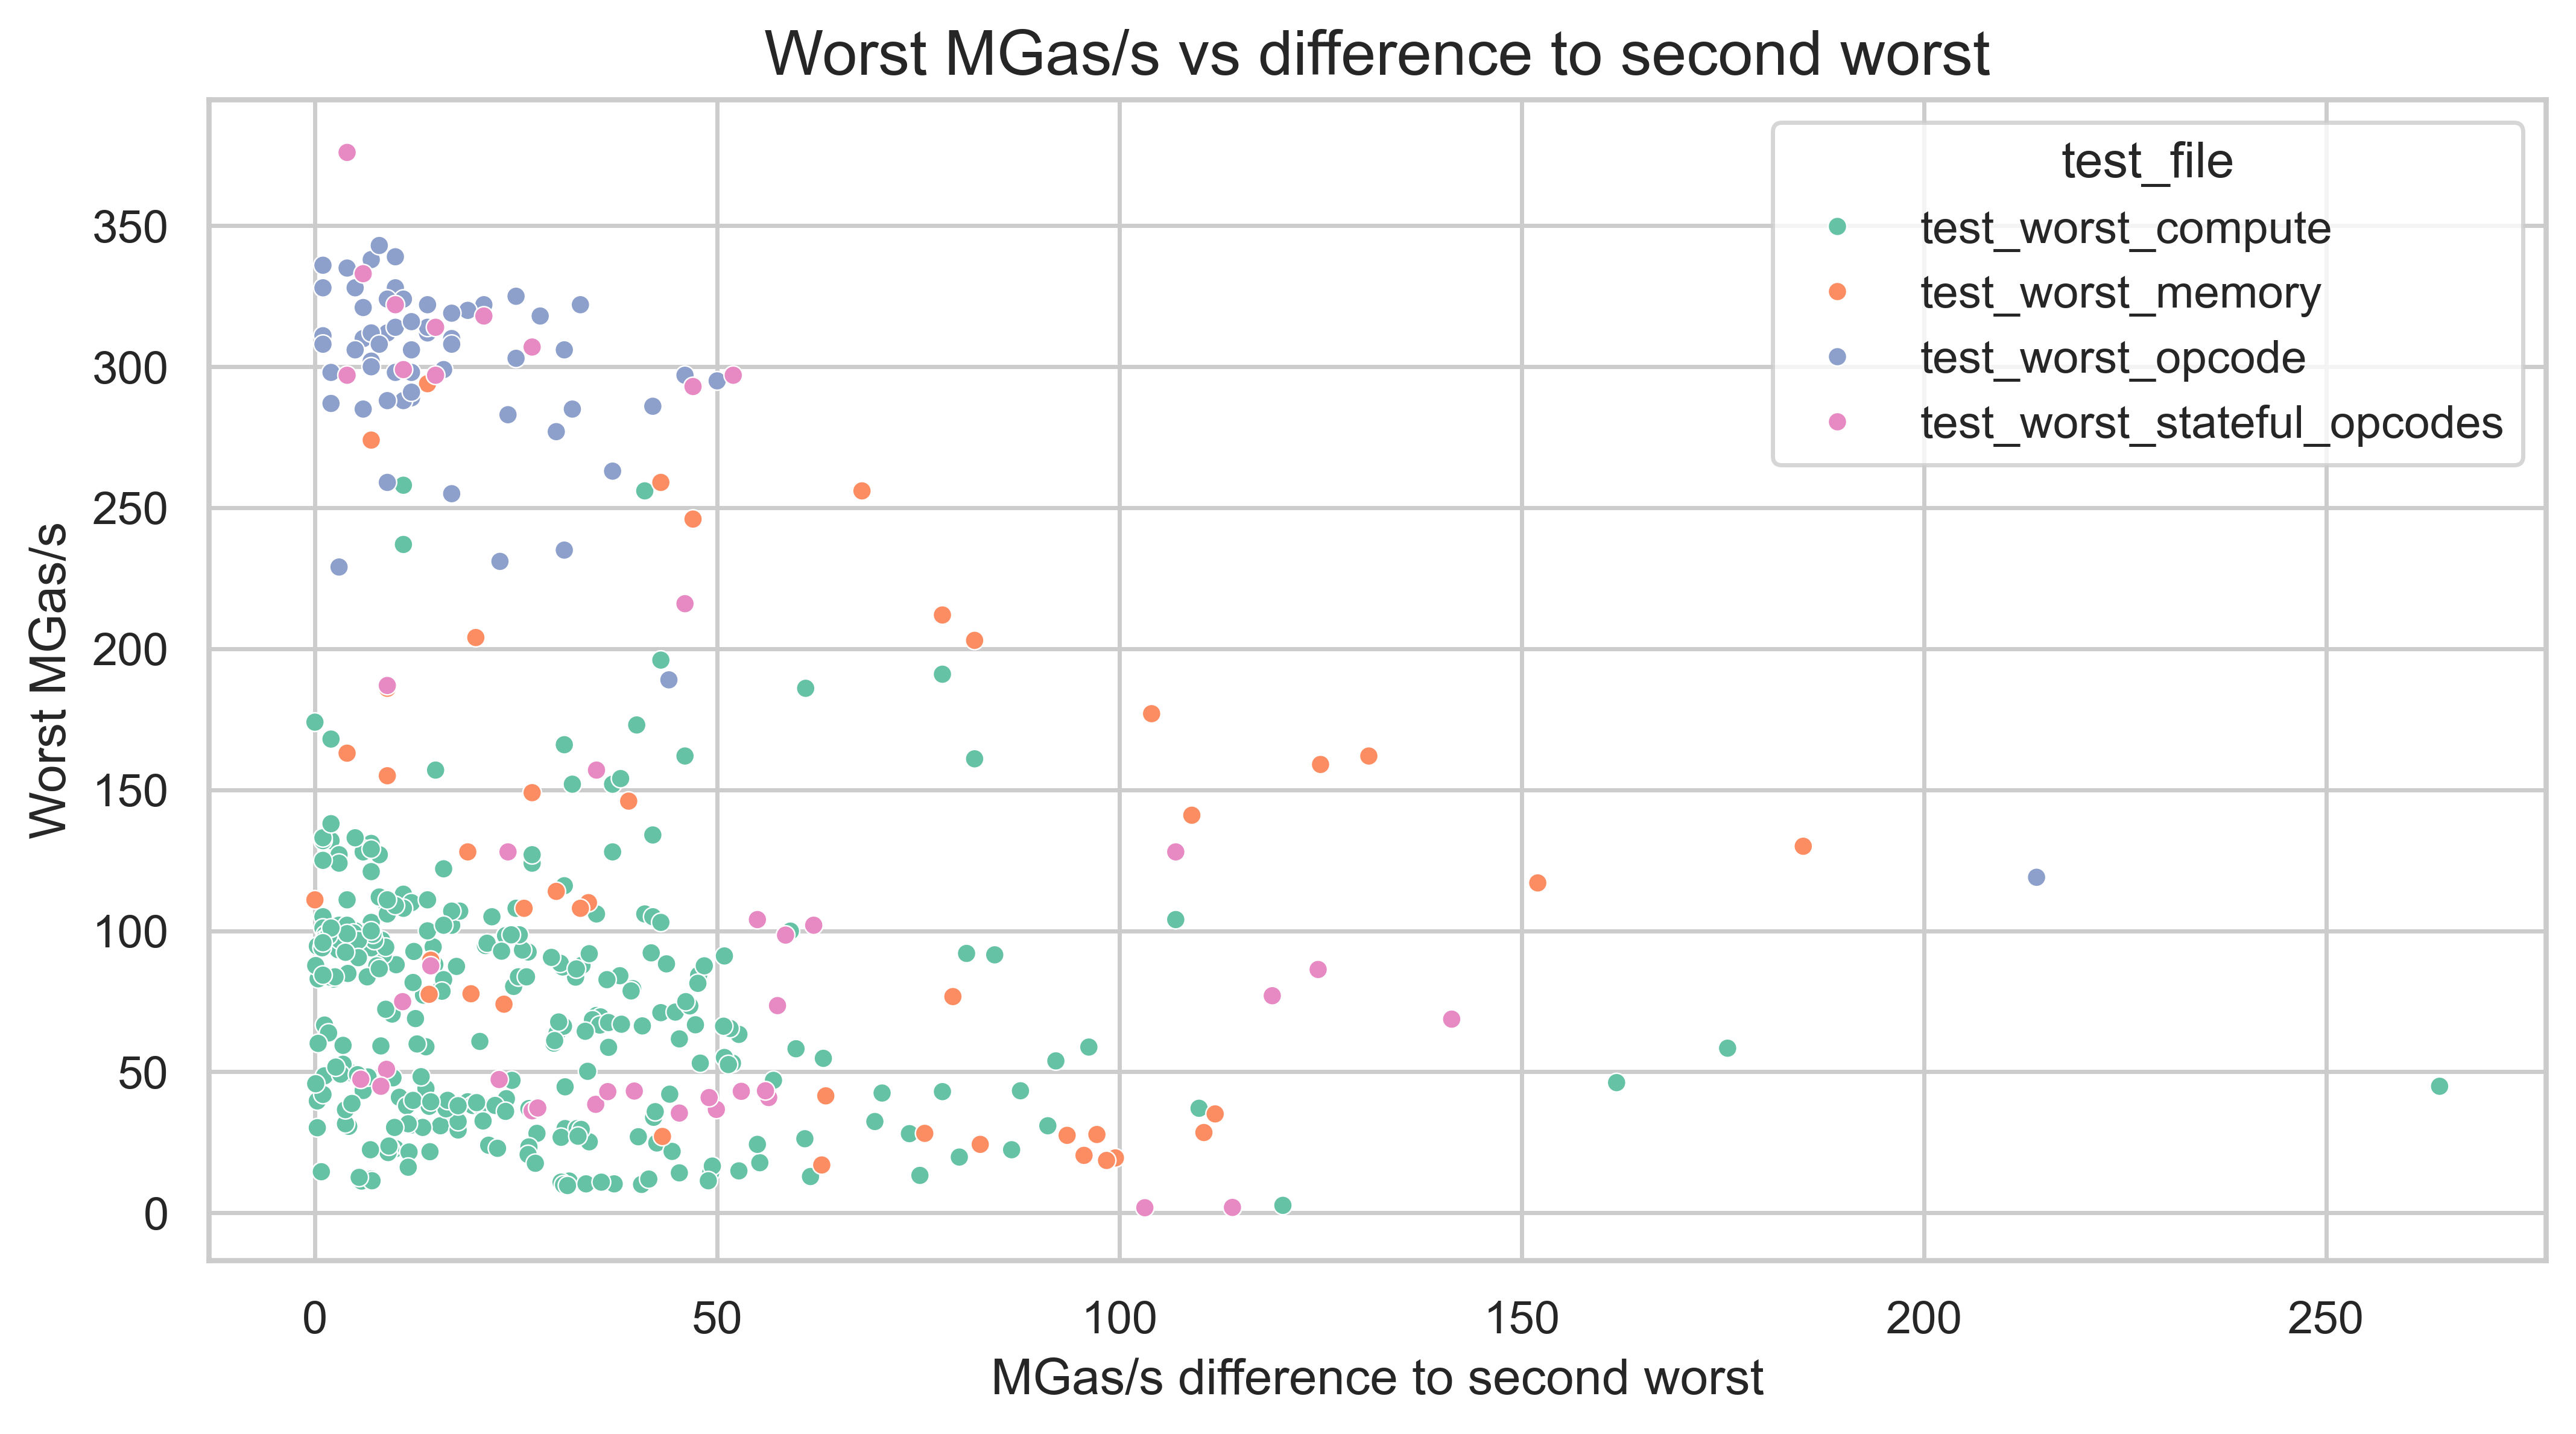

In [38]:
plt.figure(figsize=(10, 5))
sns.scatterplot(diff_df, x="second_worst_minus_worst", y="worst_mgas_s", hue="test_file", s=20)
plt.title("Worst MGas/s vs difference to second worst")
plt.xlabel("MGas/s difference to second worst")
plt.ylabel("Worst MGas/s")
plt.show()

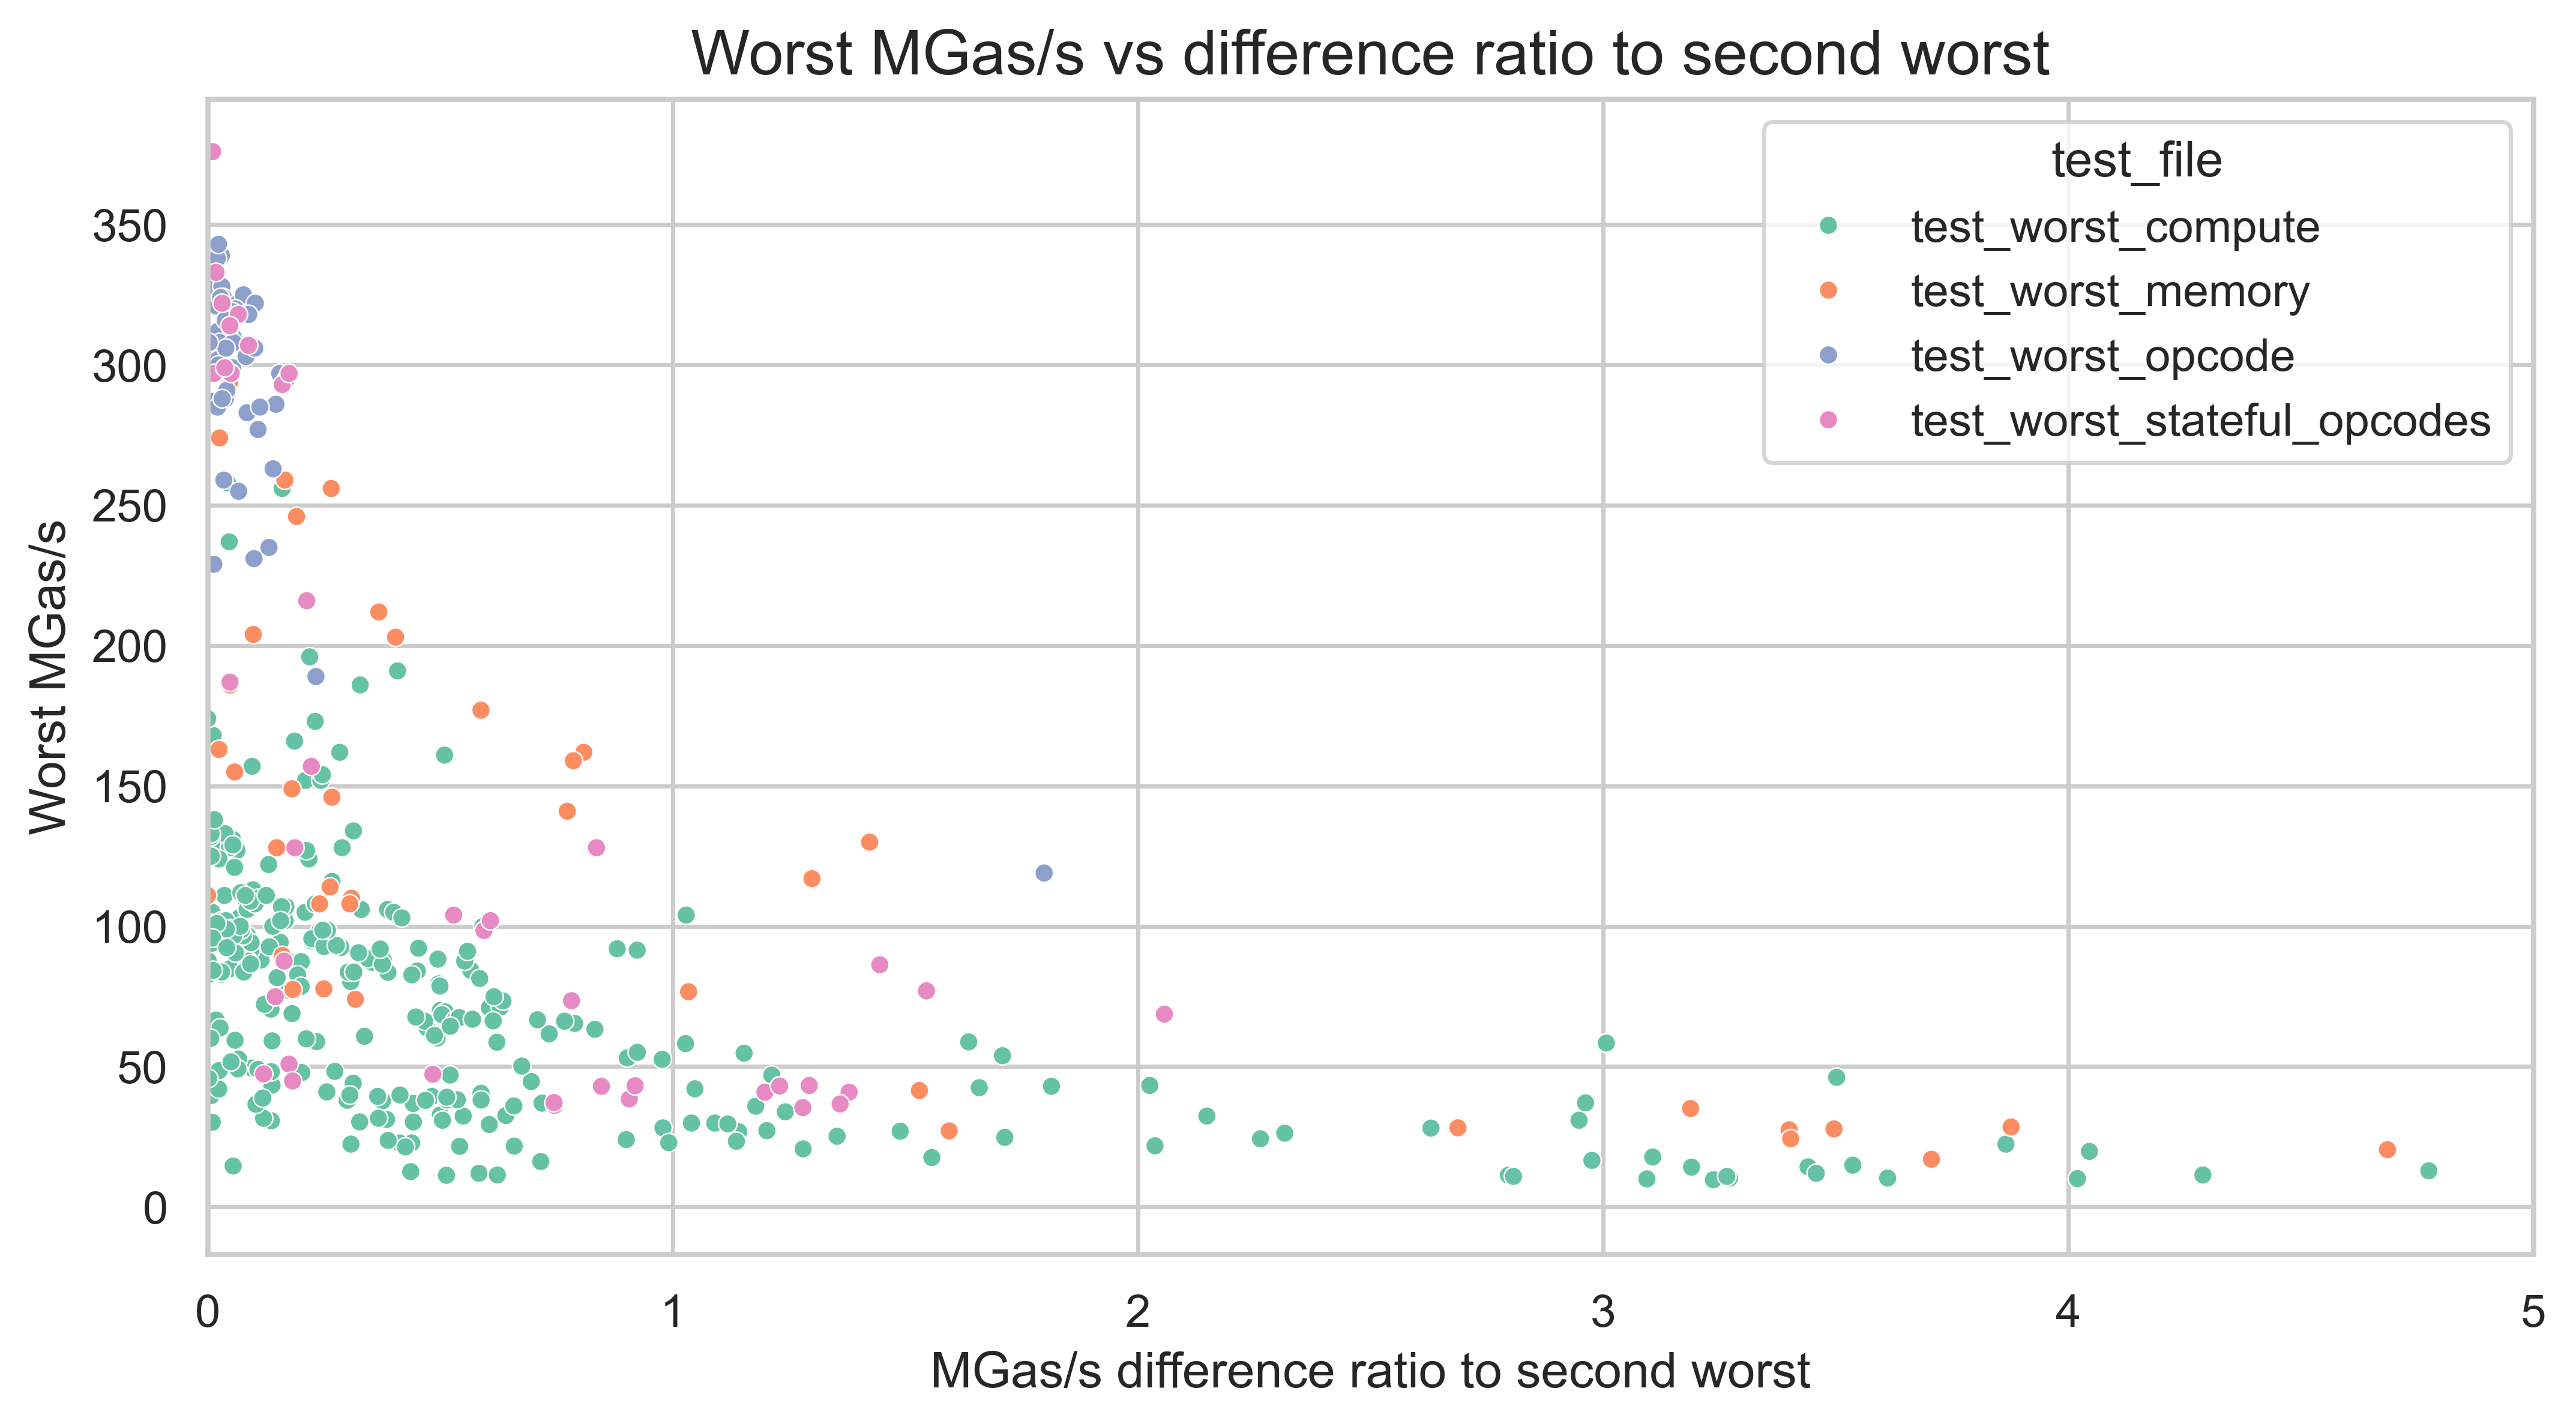

In [39]:
plt.figure(figsize=(10, 5))
sns.scatterplot(diff_df, x="second_worst_minus_worst_pct", y="worst_mgas_s", hue="test_file", s=20)
plt.title("Worst MGas/s vs difference ratio to second worst")
plt.xlabel("MGas/s difference ratio to second worst")
plt.ylabel("Worst MGas/s")
plt.xlim(0,5)
plt.show()